### Functional tests (ft.csv) - [One record per functional test per task per repetition per time point per visit per subject]

This dataset contains info on:
- Timed 25-Foot Walk (T25FW)
- Nine Hole Peg Test (NHPT) 
- Paced Auditory Serial Addition Test (PASAT)
- Symbol Digit Modalities Test (SDMT)

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

possible_paths = [
    'C:/Users/lenne/OneDrive/Documenten/Master of Statistics and Data Science/2023-2024/Master thesis/MSOAC Placebo Data',
    'C:/Users/anaso/Desktop/SOFIA MENDES/KU Leuven/Master Thesis/MSOAC Placebo dataset/csv files'
]

file_name = 'ft.csv'
file_path = next(f'{path}/{file_name}' for path in possible_paths if os.path.exists(f'{path}/{file_name}'))

# Read the CSV file into a DataFrame
ftests = pd.read_csv(file_path)
ftests.shape

C:\Users\lenne\AppData\Local\Temp\ipykernel_12064\3652019886.py:17: DtypeWarning: Columns (22,28,30) have mixed types. Specify dtype option on import or set low_memory=False.
  ftests = pd.read_csv(file_path)


(241356, 36)

In [2]:
ftests.head()

,STUDYID,DOMAIN,USUBJID,FTSEQ,FTGRPID,FTREFID,FTSPID,FTTESTCD,FTTEST,FTTSTDTL,...,VISIT,VISITDY,FTDTC,FTDY,FTTPT,FTTPTNUM,FTELTM,FTTPTREF,FTRFTDTC,FTREPNUM
0,MSOAC,FT,MSOAC/7115,6,NHPT001,NaN,NaN,NHPT0101,NHPT01-Time to Complete 9-Hole Peg Test,NaN,...,SCREENING,NaN,NaN,-50.0,PRACTICE TEST 1,10.0,NaN,NaN,NaN,2.0
1,MSOAC,FT,MSOAC/7115,5,NHPT001,NaN,NaN,NHPT0101,NHPT01-Time to Complete 9-Hole Peg Test,NaN,...,SCREENING,NaN,NaN,-50.0,PRACTICE TEST 1,10.0,NaN,NaN,NaN,1.0
2,MSOAC,FT,MSOAC/7115,3,NHPT001,NaN,NaN,NHPT0101,NHPT01-Time to Complete 9-Hole Peg Test,NaN,...,SCREENING,NaN,NaN,-50.0,PRACTICE TEST 1,10.0,NaN,NaN,NaN,2.0
3,MSOAC,FT,MSOAC/7115,2,NHPT001,NaN,NaN,NHPT0101,NHPT01-Time to Complete 9-Hole Peg Test,NaN,...,SCREENING,NaN,NaN,-50.0,PRACTICE TEST 1,10.0,NaN,NaN,NaN,1.0
4,MSOAC,FT,MSOAC/7115,10,T25FW001,NaN,NaN,T25FW101,T25FW1-Time to Complete 25-Foot Walk,NaN,...,SCREENING,NaN,NaN,-50.0,PRACTICE TEST 1,10.0,NaN,NaN,NaN,1.0


Check how many missing values we have per column. 

In [3]:
missing_percentage_ftests = (ftests.isnull().sum() / len(ftests)) * 100
missing_ftests = pd.DataFrame({'Column Name': missing_percentage_ftests.index, 'Missing Percentage': missing_percentage_ftests.values})
missing_ftests = missing_ftests.sort_values(by='Missing Percentage', ascending=False)
print(missing_ftests)

   Column Name  Missing Percentage
12       FTPOS          100.000000
34    FTRFTDTC          100.000000
33    FTTPTREF          100.000000
32      FTELTM          100.000000
5      FTREFID          100.000000
6       FTSPID          100.000000
21    FTMETHOD          100.000000
23     FTDRVFL          100.000000
9     FTTSTDTL          100.000000
20       FTNAM          100.000000
24      FTEVAL          100.000000
28       FTDTC           99.741461
19    FTREASND           98.910738
18      FTSTAT           98.466166
22      FTBLFL           96.126469
30       FTTPT           93.224946
31    FTTPTNUM           93.224946
27     VISITDY           84.545236
14    FTORRESU           42.144384
17    FTSTRESU           42.144384
35    FTREPNUM           41.147931
11      FTSCAT           33.508179
4      FTGRPID           33.461774
16    FTSTRESN           27.668258
29        FTDY           24.805267
15    FTSTRESC            1.518089
13     FTORRES            1.518089
1       DOMAIN      

Remove columns with more than 90% missingness as well as redundant columns.

In [4]:
# Set the threshold for missing percentage
threshold = 90

# Filter columns based on missing percentage
columns_to_drop = missing_ftests[missing_ftests['Missing Percentage'] >= threshold]['Column Name']

# Drop columns from the DataFrame
ftests = ftests.drop(columns=columns_to_drop)

# Remove redundant columns
ftests = ftests.drop(columns=['STUDYID', 'DOMAIN', 'FTTESTCD', 'FTORRES', 'FTORRESU', 'FTSTRESU'])

In [5]:
ftests.sort_values(by=['USUBJID', 'FTSEQ'], inplace=True)
ftests.head()

,USUBJID,FTSEQ,FTGRPID,FTTEST,FTCAT,FTSCAT,FTSTRESC,FTSTRESN,VISITNUM,VISIT,VISITDY,FTDY,FTREPNUM
193389,MSOAC/0014,1,T25FW001,T25FW1-Time to Complete 25-Foot Walk,T25FW,NaN,4.5,4.5,2.0,BASELINE,NaN,NaN,1.0
193354,MSOAC/0014,2,T25FW001,T25FW1-Time to Complete 25-Foot Walk,T25FW,NaN,4.4,4.4,2.0,BASELINE,NaN,NaN,2.0
196691,MSOAC/0014,3,T25FW001,T25FW1-More Than Two Attempts,T25FW,NaN,N,NaN,2.0,BASELINE,NaN,NaN,NaN
192233,MSOAC/0014,4,NHPT001,NHPT01-Time to Complete 9-Hole Peg Test,NHPT,DOMINANT HAND,25.6,25.6,2.0,BASELINE,NaN,NaN,1.0
191936,MSOAC/0014,5,NHPT001,NHPT01-Time to Complete 9-Hole Peg Test,NHPT,DOMINANT HAND,23.7,23.7,2.0,BASELINE,NaN,NaN,2.0


Overview of all dropped columns:

- **STUDYID**: Study Identifier (irrelevant - always the same value)
- **DOMAIN**: Domain Abbreviation (irrelevant - always the same value)
- **FTTESTCD**: Functional Test Short Name (contains the same info as "FTTEST" = Functional Test Name)
- **FTORRES**: Finding in Original Units (contains the same info as "FTSTRESC" = Character Result/Finding in Std Format, except that there can be inconsistencies in the values of FTORRES e.g. Y Yes YES used interchangeably for the same thing)
- **FTORRESU, FTSTRESU**: Original & Standard units (seconds in both cases)
- **FTPOS, FTRFTDTC, FTTPTREF, FTELTM, FTREFID, FTSPID, FTMETHOD, FTDRVFL, FTTSTDTL, FTNAM, FTEVAL**: all values missing and not even mentioned in the data dictionary 
- **FTDTC**: Date/Time of Finding (missing for 99.7% of observations)
- **FTREASND**: Reason Not Performed (missing for 98.9% of observations) **(keep in mind for extreme observations)**
- **FTSTAT**: Completion Status (missing for 98.5% of observations)
- **FTBLFL**: Baseline Flag (missing for 96.1% of observations)
- **FTTPT, FTTPTNUM**: Planned Time Point Name & Number (missing for 93.2% of observations)

In [6]:
unique_usubjid_count = ftests['USUBJID'].nunique()
print("Number of unique values in USUBJID:", unique_usubjid_count)

Number of unique values in USUBJID: 2465


**We have data on all 2465 patients for the functional tests.**

Which columns are numeric and categorical? (see also SDTM fields in Data Dictionary)

In [7]:
# Create an empty list to store column types
column_types = []

# Iterate through each column
for column, dtype in ftests.dtypes.items():
    # Categorize columns
    if dtype == 'object':
        column_type = 'categorical'
    elif dtype in ['int64', 'float64']:
        column_type = 'numeric'
    else:
        column_type = 'other'

    # Append to the list
    column_types.append({'Column': column, 'Type': column_type})

# Create a DataFrame from the list
column_types_df = pd.DataFrame(column_types)

# Display the resulting DataFrame
column_types_df

,Column,Type
0,USUBJID,categorical
1,FTSEQ,numeric
2,FTGRPID,categorical
3,FTTEST,categorical
4,FTCAT,categorical
5,FTSCAT,categorical
6,FTSTRESC,categorical
7,FTSTRESN,numeric
8,VISITNUM,numeric
9,VISIT,categorical


- Descriptive statistics for numeric variables

In [8]:
numeric_columns = ['FTSEQ', 'FTSTRESN', 'VISITNUM', 'VISITDY', 'FTDY', 'FTREPNUM']

descriptive_numeric = {
    'Count': ftests[numeric_columns].count(), 
    'Missing Cases': ftests[numeric_columns].isna().sum(),
    'Missing %': round((ftests[numeric_columns].isna().sum() / len(ftests)) * 100, 2),  
    'Median': ftests[numeric_columns].median(),
    'Standard Deviation': ftests[numeric_columns].std()
}

num_ftests = pd.DataFrame(descriptive_numeric)
num_ftests

,Count,Missing Cases,Missing %,Median,Standard Deviation
FTSEQ,241356,0,0.00,51.0,38.113581
FTSTRESN,174577,66779,27.67,22.0,20.327130
VISITNUM,241356,0,0.00,11.0,205.031511
VISITDY,37301,204055,84.55,268.0,251.544301
FTDY,181487,59869,24.81,173.0,295.597788
FTREPNUM,142043,99313,41.15,1.0,0.500016


- FTSEQ (Sequence number)

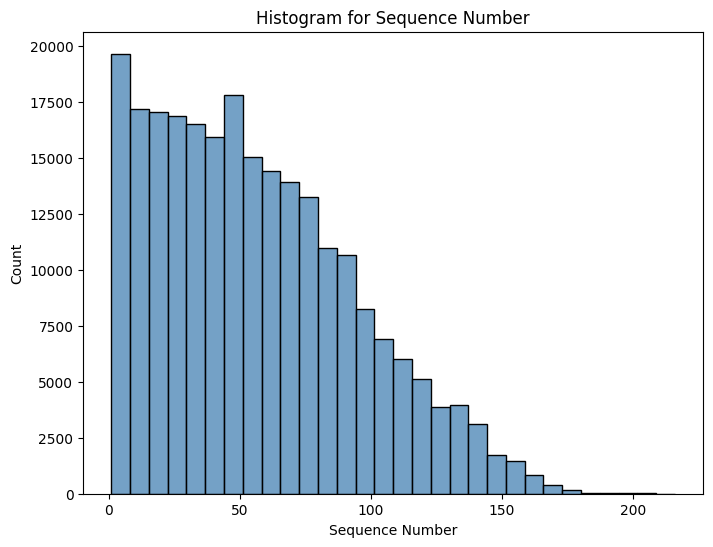

In [9]:
FTSEQ = ftests['FTSEQ'].dropna()

plt.figure(figsize=(8, 6))
sns.histplot(FTSEQ, kde=False, color='steelblue', bins=30)
plt.xlabel('Sequence Number')
plt.ylabel('Count')
plt.title('Histogram for Sequence Number')
plt.show()

- FTSTRESN (Numeric Result/Finding in Standard Units)

**NOTE:** This column gives the results for the functional tests with a numeric outcome. For this reason, we need to make a separate plot for each unique functional test name (FTTEST), but only the ones that have a numeric outcome.

**Need to check this with R&F because according to a paper, the convention for patients unable to perform is: 180 sec for T25FW & 300 sec for 9HPT - but in this dataset there are some values even larger than this?**

In [10]:
# Define the 'FTTEST' values with a numeric outcome
num_FTTEST_values = [
    'T25FW1-Time to Complete 25-Foot Walk',
    'NHPT01-Time to Complete 9-Hole Peg Test',
    'PASAT1-Total Correct',
    'SDMT01-Total Score'
]

We check how many observations each patient has for the numeric functional tests.

In [11]:
# Filter rows based on the specified values of FTTEST
filtered_rows = ftests[ftests['FTTEST'].isin(num_FTTEST_values)]

# Group by FTTEST and USUBJID, then count the number of rows for each group
outcome_measure_counts = filtered_rows.groupby(['FTTEST', 'USUBJID']).size().reset_index(name='Observation_Count')
outcome_measure_counts


,FTTEST,USUBJID,Observation_Count
0,NHPT01-Time to Complete 9-Hole Peg Test,MSOAC/0014,8
1,NHPT01-Time to Complete 9-Hole Peg Test,MSOAC/0019,64
2,NHPT01-Time to Complete 9-Hole Peg Test,MSOAC/0024,48
3,NHPT01-Time to Complete 9-Hole Peg Test,MSOAC/0030,28
4,NHPT01-Time to Complete 9-Hole Peg Test,MSOAC/0031,56
...,...,...,...
7748,T25FW1-Time to Complete 25-Foot Walk,MSOAC/9986,14
7749,T25FW1-Time to Complete 25-Foot Walk,MSOAC/9987,18
7750,T25FW1-Time to Complete 25-Foot Walk,MSOAC/9995,18
7751,T25FW1-Time to Complete 25-Foot Walk,MSOAC/9998,32


In [12]:
outcome_measure_counts.groupby('FTTEST')['Observation_Count'].describe()

,count,mean,std,min,25%,50%,75%,max
FTTEST,,,,,,,,
NHPT01-Time to Complete 9-Hole Peg Test,2394.0,39.156642,14.679160,4.0,28.0,40.0,48.0,76.0
PASAT1-Total Correct,2394.0,13.997911,8.730850,1.0,7.0,11.0,20.0,38.0
SDMT01-Total Score,500.0,4.888000,0.544103,2.0,5.0,5.0,5.0,6.0
T25FW1-Time to Complete 25-Foot Walk,2465.0,19.640162,7.255815,2.0,14.0,20.0,24.0,38.0


The mean represents the average number of measurements for that specific test and the count is the number of patients for which we have this outcome. There seem to be a good amount of measurements for all of the test, except for SDMT with an average of only ~5. Additionally, we only have info about the total SDMT score for 500 patients.

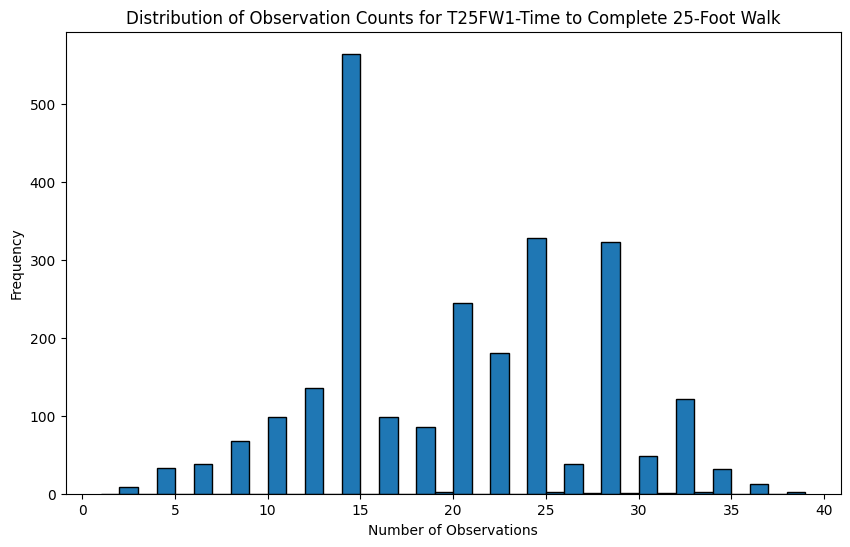

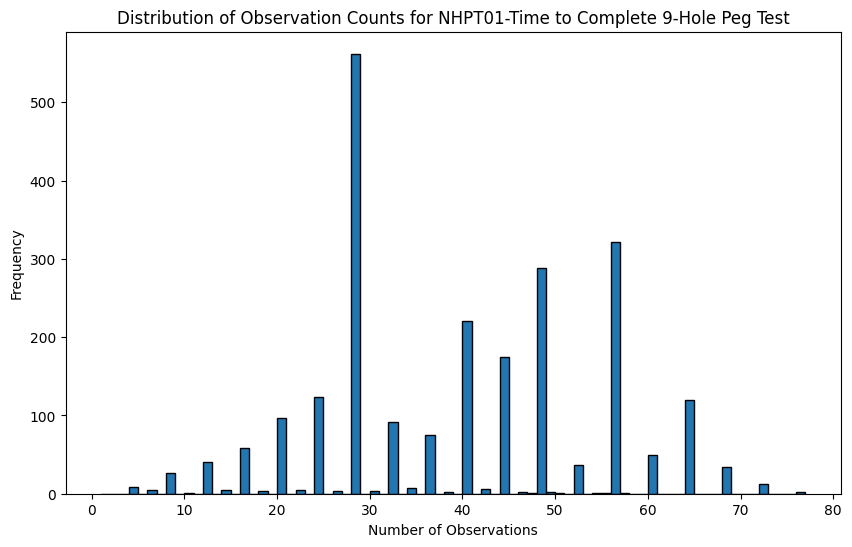

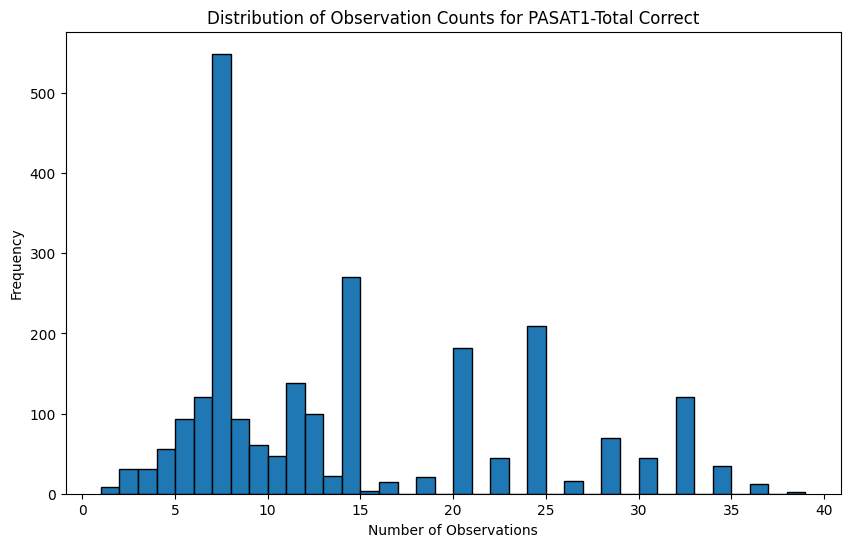

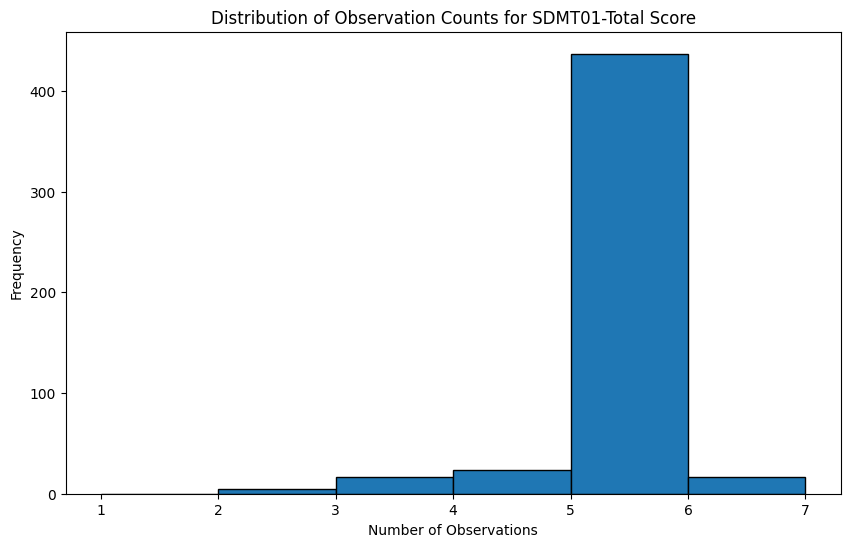

In [13]:
# Plot histograms for each FTTEST value
for fttest_value in num_FTTEST_values:
    data_subset = outcome_measure_counts[outcome_measure_counts['FTTEST'] == fttest_value]
    
    plt.figure(figsize=(10, 6))
    plt.hist(data_subset['Observation_Count'], bins=range(1, max(data_subset['Observation_Count']) + 2), edgecolor='black')
    plt.title(f'Distribution of Observation Counts for {fttest_value}')
    plt.xlabel('Number of Observations')
    plt.ylabel('Frequency')
    plt.show()

Remove the barcharts & boxplots ? Since we will aggregate this for the static dataframe anyway

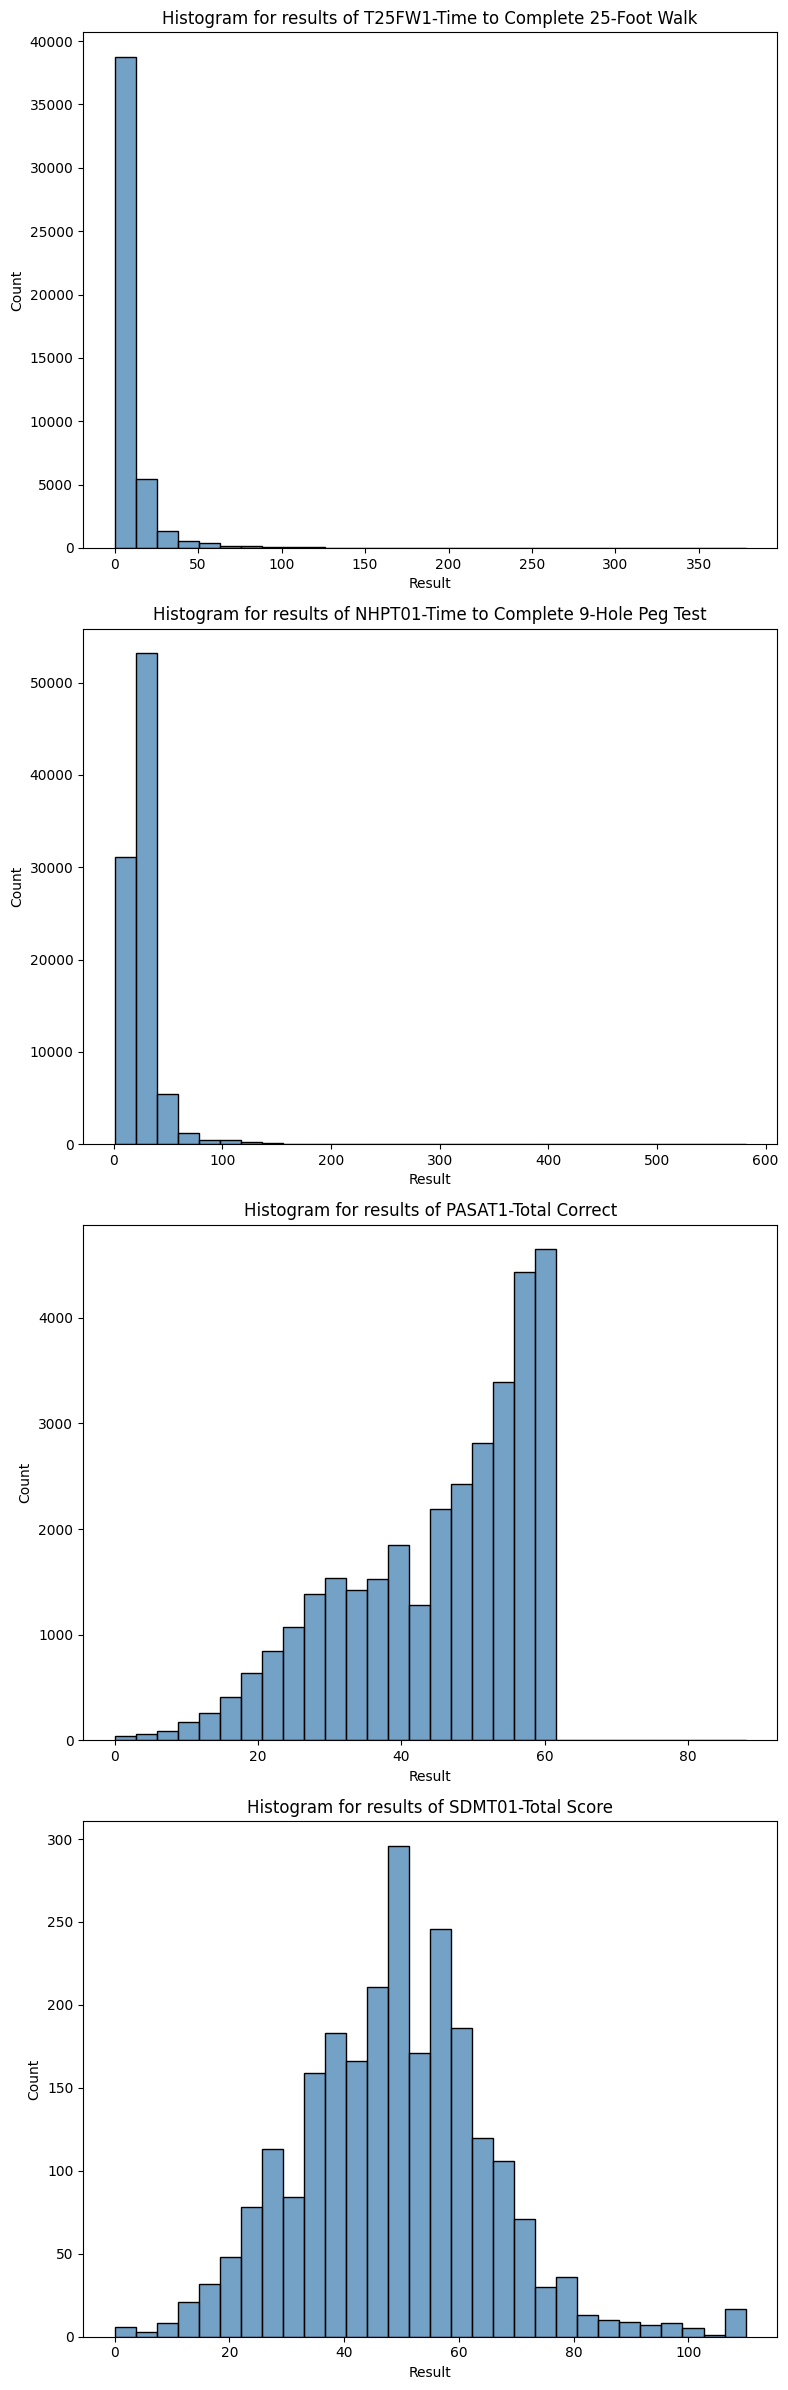

In [14]:
# Barcharts
fig, axes = plt.subplots(nrows=len(num_FTTEST_values), figsize=(8, 6 * len(num_FTTEST_values)))

# Iterate over numeric FTTEST values
for i, fttest_value in enumerate(num_FTTEST_values):
    subset_data = ftests[ftests['FTTEST'] == fttest_value]
    
    # Create histogram for the subset
    sns.histplot(subset_data['FTSTRESN'].dropna(), kde=False, color='steelblue', bins=30, ax=axes[i])
    
    # Customize subplot
    axes[i].set_xlabel('Result')
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'Histogram for results of {fttest_value}')

plt.tight_layout()
plt.show()

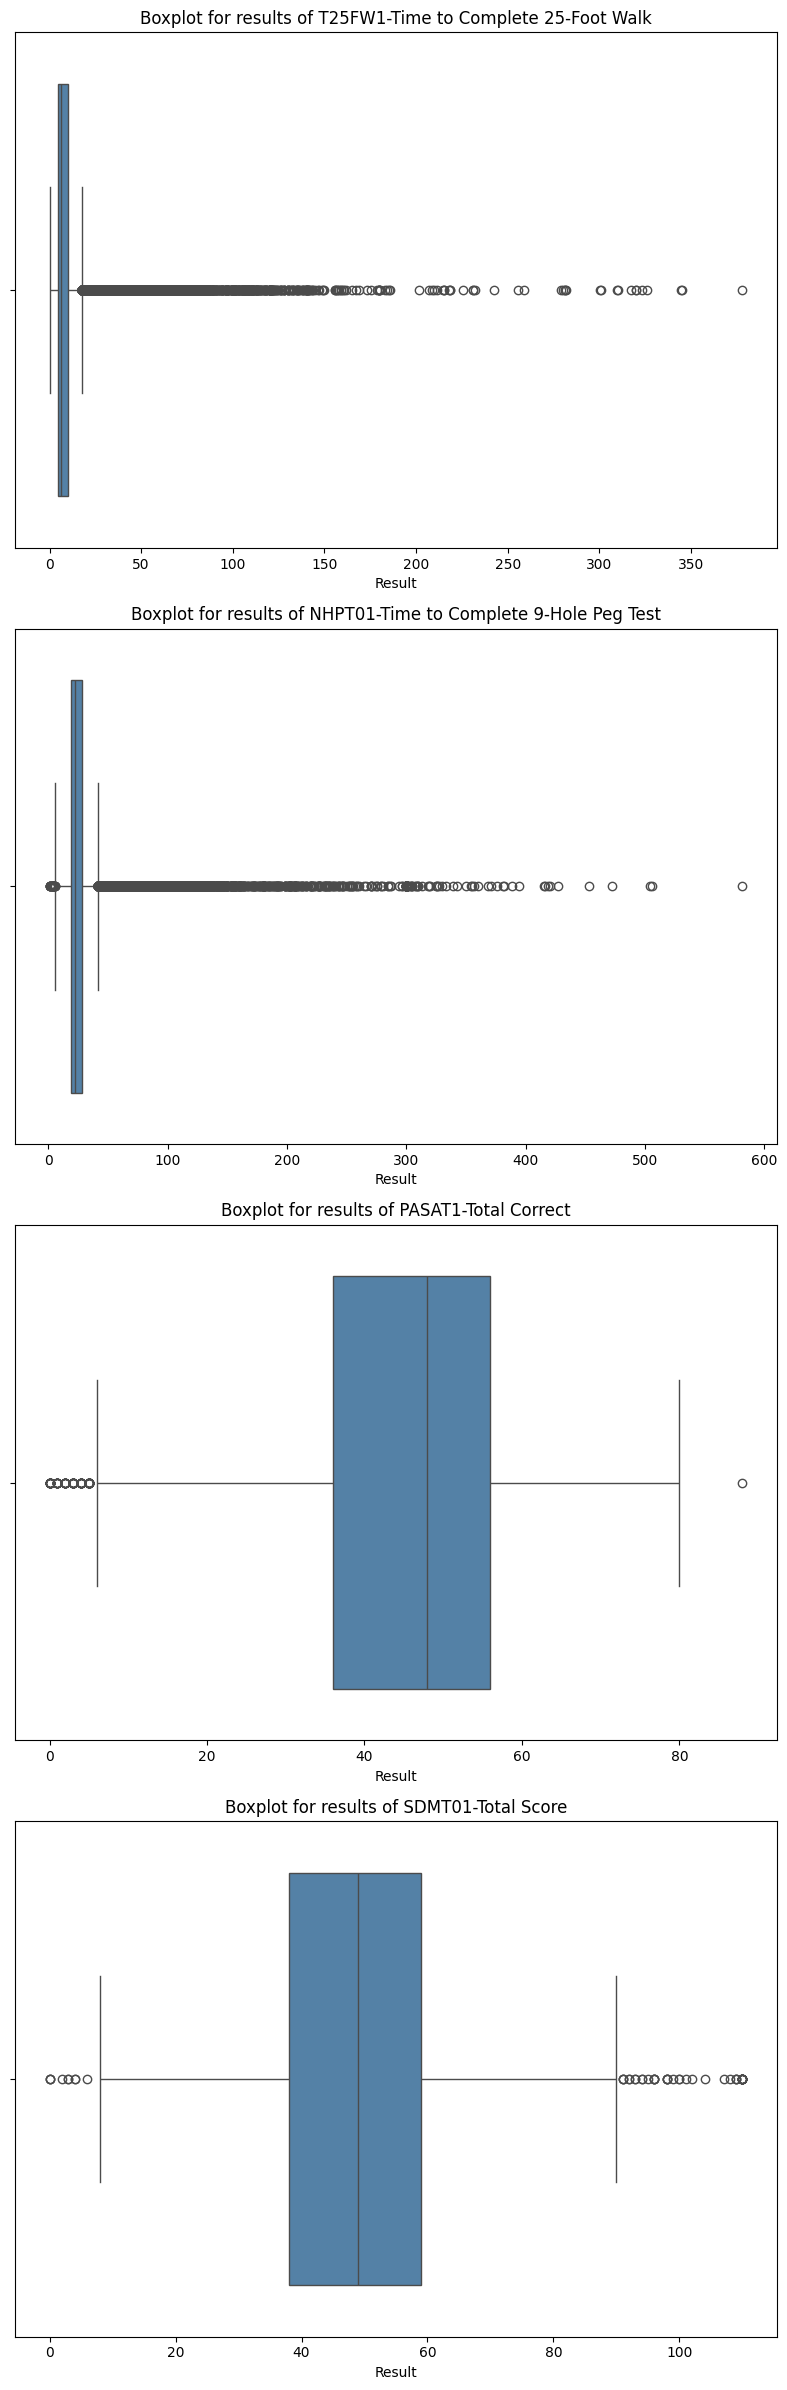

In [15]:
fig, axes = plt.subplots(nrows=len(num_FTTEST_values), figsize=(8, 6 * len(num_FTTEST_values)))

# Iterate over numeric FTTEST values
for i, fttest_value in enumerate(num_FTTEST_values):
    subset_data = ftests[ftests['FTTEST'] == fttest_value]
    
    # Create horizontal boxplot for the subset
    sns.boxplot(x=subset_data['FTSTRESN'].dropna(), color='steelblue', ax=axes[i])
    
    # Customize subplot
    axes[i].set_xlabel('Result')
    axes[i].set_title(f'Boxplot for results of {fttest_value}')

plt.tight_layout()
plt.show()

- VISITNUM (Visit Number)

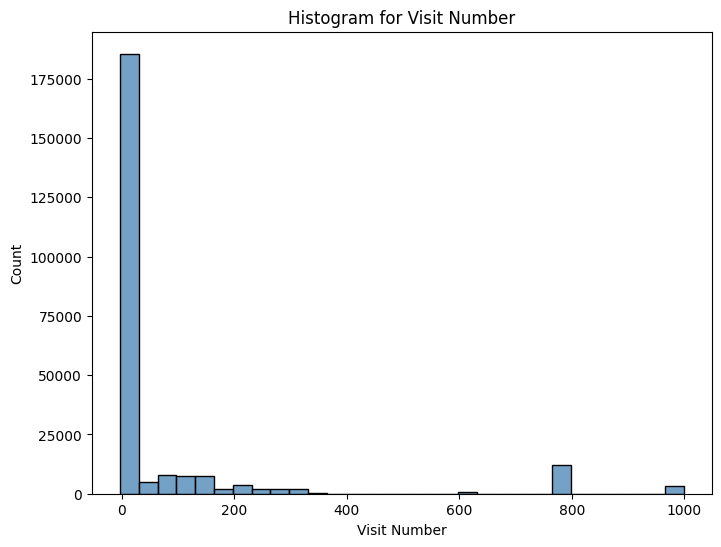

In [16]:
VISITNUM_ftests = ftests['VISITNUM'].dropna()

plt.figure(figsize=(8, 6))
sns.histplot(VISITNUM_ftests, kde=False, color='steelblue', bins=30)
plt.xlabel('Visit Number')
plt.ylabel('Count')
plt.title('Histogram for Visit Number')
plt.show()

- VISITDY (Visit Day)  

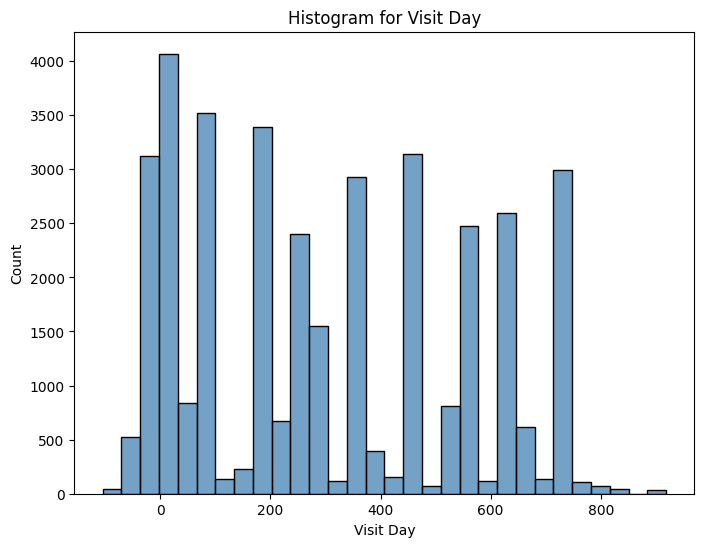

In [17]:
VISITDY_ftests = ftests['VISITDY'].dropna()

plt.figure(figsize=(8, 6))
sns.histplot(VISITDY_ftests, kde=False, color='steelblue', bins=30)
plt.xlabel('Visit Day')
plt.ylabel('Count')
plt.title('Histogram for Visit Day')
plt.show()

- FTDY (Study Day of Collection)

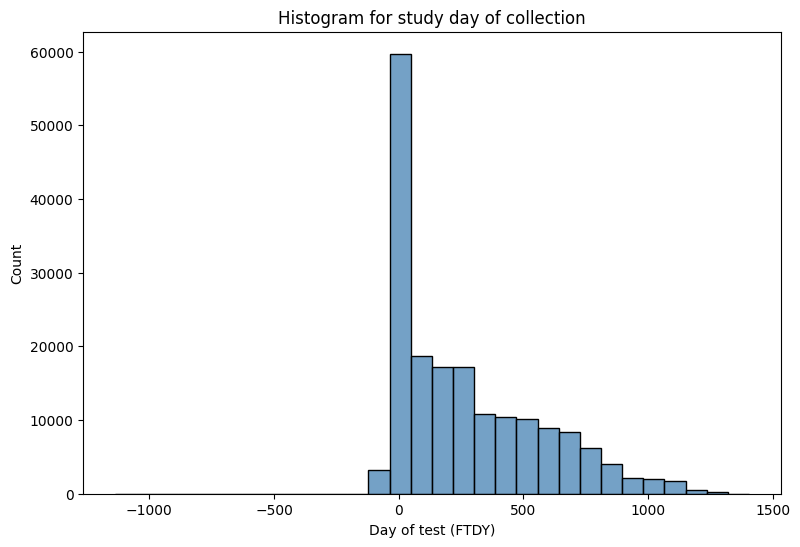

In [18]:
FTDY = ftests['FTDY'].dropna()

plt.figure(figsize=(9, 6))
sns.histplot(FTDY, kde=False, color='steelblue', bins=30)
plt.ylabel('Count')
plt.xlabel('Day of test (FTDY)')
plt.title('Histogram for study day of collection')
plt.show()

In [19]:
FTDY.describe()

count    181487.000000
mean        263.082551
std         295.597788
min       -1138.000000
25%           1.000000
50%         173.000000
75%         456.000000
max        1404.000000
Name: FTDY, dtype: float64

In [20]:
unique_FTDY_values_count = ftests['FTDY'].nunique()
unique_FTDY_values_count

1002

1002 unique values of study day of collection

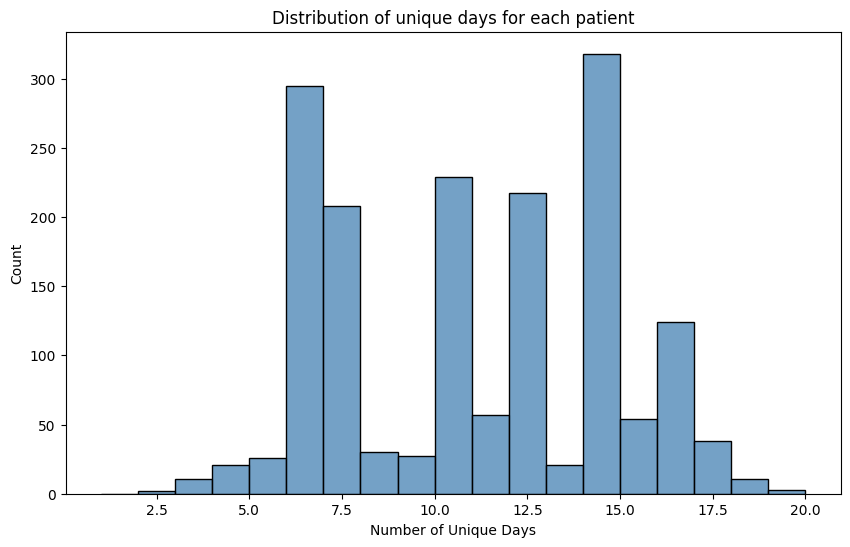

In [21]:
subject_days_count = ftests.groupby('USUBJID')['FTDY'].nunique()
plt.figure(figsize=(10, 6))
sns.histplot(subject_days_count, bins=range(1, subject_days_count.max() + 2), kde=False, color='steelblue')
plt.title('Distribution of unique days for each patient')
plt.xlabel('Number of Unique Days')
plt.ylabel('Count')
plt.show()

In [22]:
subject_days_count.describe()

count    2465.000000
mean        7.262069
std         5.784927
min         0.000000
25%         0.000000
50%         7.000000
75%        12.000000
max        19.000000
Name: FTDY, dtype: float64

Distribution of length of follow-up

In [23]:
# Calculate the maximum and minimum values of FTDY for each unique patient ID
ftests_max_min = ftests.groupby('USUBJID')['FTDY'].agg(['max', 'min']).reset_index()

# Calculate the difference between the maximum and minimum values
ftests_max_min['Difference'] = ftests_max_min['max'] - ftests_max_min['min']

# Display the number of unique values in the "Difference" column
num_unique_values = ftests_max_min['Difference'].nunique()
print(f"Number of unique values in the 'Difference' column: {num_unique_values}")

Number of unique values in the 'Difference' column: 481


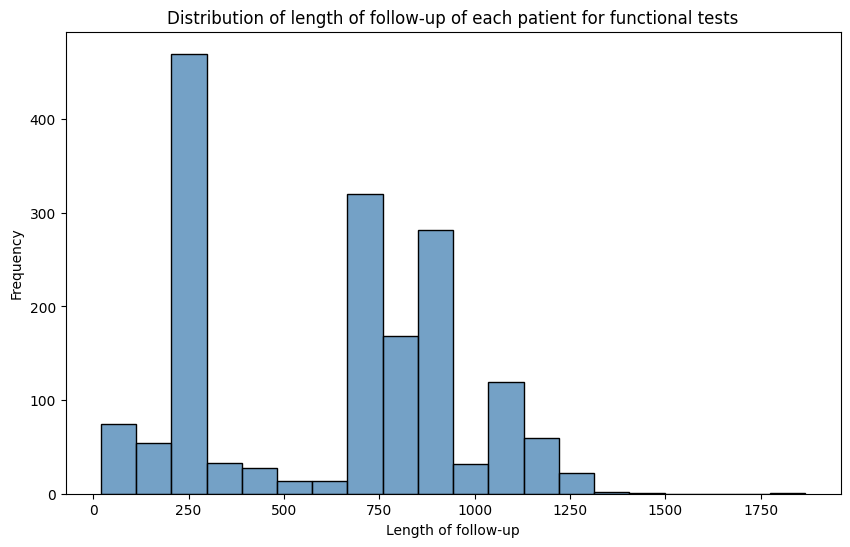

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(ftests_max_min['Difference'], bins=20, kde=False, color='steelblue')
plt.title('Distribution of length of follow-up of each patient for functional tests')
plt.xlabel('Length of follow-up')
plt.ylabel('Frequency')
plt.show()

In [25]:
negative_ftdy_rows = ftests[ftests['FTDY'] < 0]
negative_ftdy_rows
# 1/6th of all rows in the dataframe so is substantial

,USUBJID,FTSEQ,FTGRPID,FTTEST,FTCAT,FTSCAT,FTSTRESC,FTSTRESN,VISITNUM,VISIT,VISITDY,FTDY,FTREPNUM
30678,MSOAC/0016,1,T25FW001,T25FW1-More Than Two Attempts,T25FW,NaN,N,NaN,1.0,SCREENING,NaN,-21.0,NaN
30622,MSOAC/0016,2,T25FW001,T25FW1-Time to Complete 25-Foot Walk,T25FW,NaN,9.4,9.4,1.0,SCREENING,NaN,-21.0,1.0
30626,MSOAC/0016,3,T25FW001,T25FW1-Time to Complete 25-Foot Walk,T25FW,NaN,9.7,9.7,1.0,SCREENING,NaN,-21.0,2.0
37146,MSOAC/0016,4,T25FW002,T25FW1-More Than Two Attempts,T25FW,NaN,N,NaN,2.0,VISIT 0,NaN,-14.0,NaN
37116,MSOAC/0016,5,T25FW002,T25FW1-Time to Complete 25-Foot Walk,T25FW,NaN,8.3,8.3,2.0,VISIT 0,NaN,-14.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42066,MSOAC/9998,26,PASAT003,PASAT1-Total Correct,PASAT,3 SECONDS,37,37.0,-1.0,SCREENING -1,NaN,-7.0,NaN
42193,MSOAC/9998,27,PASAT003,PASAT1-More Than One Attempt,PASAT,NaN,N,NaN,-1.0,SCREENING -1,NaN,-7.0,NaN
41962,MSOAC/9998,28,T25FW003,T25FW1-Time to Complete 25-Foot Walk,T25FW,NaN,5.8,5.8,-1.0,SCREENING -1,NaN,-7.0,1.0
41968,MSOAC/9998,29,T25FW003,T25FW1-Time to Complete 25-Foot Walk,T25FW,NaN,6,6.0,-1.0,SCREENING -1,NaN,-7.0,2.0


- FTREPNUM (Repetition Number) is discrete

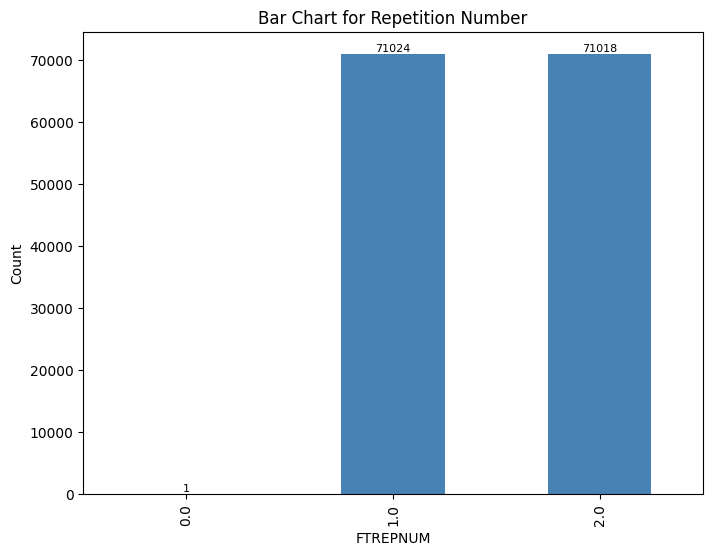

In [26]:
FTREPNUM_ftests = ftests['FTREPNUM'].dropna()

plt.figure(figsize=(8, 6))
ax = FTREPNUM_ftests.value_counts().sort_index().plot(kind='bar', color='steelblue')  # Sorting the index

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), str(int(p.get_height())), ha='center', va='bottom', fontsize=8)

plt.xlabel('FTREPNUM')
plt.ylabel('Count')
plt.title('Bar Chart for Repetition Number')
plt.show()

Only 1 row seems to have a repetition number of 0, might be a data entry error. Looking at this row shows that it is the measurement of the Time to Complete 25-Foot Walk for patient with ID 7430. The value for the test outcome is missing. 

In [27]:
row_with_ftrepnum_0 = ftests[ftests['FTREPNUM'] == 0]
row_with_ftrepnum_0

,USUBJID,FTSEQ,FTGRPID,FTTEST,FTCAT,FTSCAT,FTSTRESC,FTSTRESN,VISITNUM,VISIT,VISITDY,FTDY,FTREPNUM
213718,MSOAC/7430,51,T25FW006,T25FW1-Time to Complete 25-Foot Walk,T25FW,NaN,NaN,NaN,11.0,V11 - MONTH 18,NaN,NaN,0.0


In [28]:
filtered_rows = ftests[(ftests['FTTEST'] == 'T25FW1-Time to Complete 25-Foot Walk') & (ftests['USUBJID'] == 'MSOAC/7430')]
filtered_rows

,USUBJID,FTSEQ,FTGRPID,FTTEST,FTCAT,FTSCAT,FTSTRESC,FTSTRESN,VISITNUM,VISIT,VISITDY,FTDY,FTREPNUM
185627,MSOAC/7430,1,T25FW001,T25FW1-Time to Complete 25-Foot Walk,T25FW,NaN,4.9,4.9,1.0,V1 - SCREENING,NaN,NaN,1.0
185448,MSOAC/7430,2,T25FW001,T25FW1-Time to Complete 25-Foot Walk,T25FW,NaN,4.5,4.5,1.0,V1 - SCREENING,NaN,NaN,2.0
185685,MSOAC/7430,11,T25FW002,T25FW1-Time to Complete 25-Foot Walk,T25FW,NaN,5,5.0,1.0,V1 - SCREENING,NaN,NaN,1.0
185580,MSOAC/7430,12,T25FW002,T25FW1-Time to Complete 25-Foot Walk,T25FW,NaN,4.8,4.8,1.0,V1 - SCREENING,NaN,NaN,2.0
193384,MSOAC/7430,21,T25FW003,T25FW1-Time to Complete 25-Foot Walk,T25FW,NaN,4.4,4.4,2.0,V2 - BASELINE,NaN,NaN,1.0
193477,MSOAC/7430,22,T25FW003,T25FW1-Time to Complete 25-Foot Walk,T25FW,NaN,4.6,4.6,2.0,V2 - BASELINE,NaN,NaN,2.0
199076,MSOAC/7430,31,T25FW004,T25FW1-Time to Complete 25-Foot Walk,T25FW,NaN,4,4.0,7.0,V7 - MONTH 6,NaN,NaN,1.0
199077,MSOAC/7430,32,T25FW004,T25FW1-Time to Complete 25-Foot Walk,T25FW,NaN,4,4.0,7.0,V7 - MONTH 6,NaN,NaN,2.0
205902,MSOAC/7430,41,T25FW005,T25FW1-Time to Complete 25-Foot Walk,T25FW,NaN,4.2,4.2,9.0,V9 - MONTH 12,NaN,NaN,1.0
205903,MSOAC/7430,42,T25FW005,T25FW1-Time to Complete 25-Foot Walk,T25FW,NaN,4.2,4.2,9.0,V9 - MONTH 12,NaN,NaN,2.0


Upon inspection, it seems that the repetition number of 0 needed to be a 1 instead.

In [29]:
row_with_ftrepnum_0 = ftests[ftests['FTREPNUM'] == 0]
ftests.loc[row_with_ftrepnum_0.index, 'FTREPNUM'] = 1

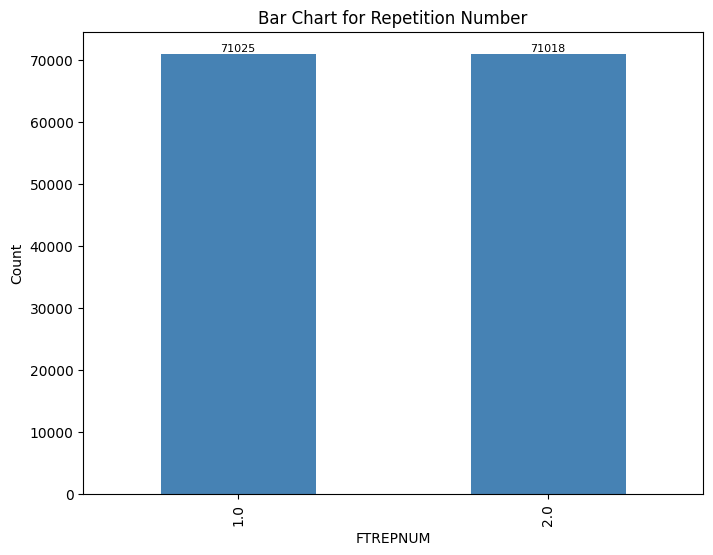

In [30]:
FTREPNUM_ftests = ftests['FTREPNUM'].dropna()

plt.figure(figsize=(8, 6))
ax = FTREPNUM_ftests.value_counts().sort_index().plot(kind='bar', color='steelblue')  # Sorting the index

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), str(int(p.get_height())), ha='center', va='bottom', fontsize=8)

plt.xlabel('FTREPNUM')
plt.ylabel('Count')
plt.title('Bar Chart for Repetition Number')
plt.show()

- Descriptive statistics for categorical variables

In [31]:
categorical_columns = ['FTGRPID', 'FTTEST', 'FTCAT', 'FTSCAT', 'FTSTRESC', 'VISIT']

descriptive_categorical = {}
for col in categorical_columns:
    descriptive_categorical[col] = {
        'Count': ftests[col].count(),
        'Missing Cases': ftests[col].isna().sum(),
        'Missing %': round((ftests[col].isna().sum() / len(ftests)) * 100, 2),
        'Unique Values': ftests[col].nunique(),
        'Mode': ftests[col].mode().values[0],
        'Mode Frequency': ftests[col].value_counts().max()
    }

cat_ftests = pd.DataFrame(descriptive_categorical).T
cat_ftests

,Count,Missing Cases,Missing %,Unique Values,Mode,Mode Frequency
FTGRPID,160594,80762,33.46,54,NHPT001,7623
FTTEST,241356,0,0.0,9,NHPT01-Time to Complete 9-Hole Peg Test,93741
FTCAT,241356,0,0.0,4,NHPT,123559
FTSCAT,160482,80874,33.51,4,DOMINANT HAND,61836
FTSTRESC,237692,3664,1.52,1669,N,62617
VISIT,241356,0,0.0,99,SCREENING,17056


- Number of observations for each FTGRPID (group ID) category

In [32]:
FTGRPID_counts = ftests['FTGRPID'].value_counts().reset_index()
FTGRPID_counts.columns = ['FTGRPID', 'Count']
FTGRPID_counts = FTGRPID_counts.sort_values(by='FTGRPID')
FTGRPID_counts

,FTGRPID,Count
0,NHPT001,7623
1,NHPT002,7497
2,NHPT003,7364
3,NHPT004,7150
5,NHPT005,6878
9,NHPT006,6325
12,NHPT007,5677
26,NHPT008,2418
29,NHPT009,1945
33,NHPT010,1602


13 NHPT groups, 20 PASAT groups, 21 T25FW groups ('groups' means here how many times a test was maximally repeated for the same patient) - no groups for SDMT: maximally performed once for each patient

- Number of observations for each FTTEST (functional test name) category

In [33]:
FTTEST_counts = ftests['FTTEST'].value_counts().reset_index()
FTTEST_counts.columns = ['FTTEST', 'Count']
FTTEST_counts = FTTEST_counts.sort_values(by='Count', ascending=False)
FTTEST_counts

,FTTEST,Count
0,NHPT01-Time to Complete 9-Hole Peg Test,93741
1,T25FW1-Time to Complete 25-Foot Walk,48413
2,PASAT1-Total Correct,33511
3,NHPT01-More Than Two Attempts,29782
4,T25FW1-More Than Two Attempts,19702
5,PASAT1-More Than One Attempt,13426
6,SDMT01-Total Score,2444
7,T25FW1-Complete Two Successful Trials,208
8,Functional Test,129


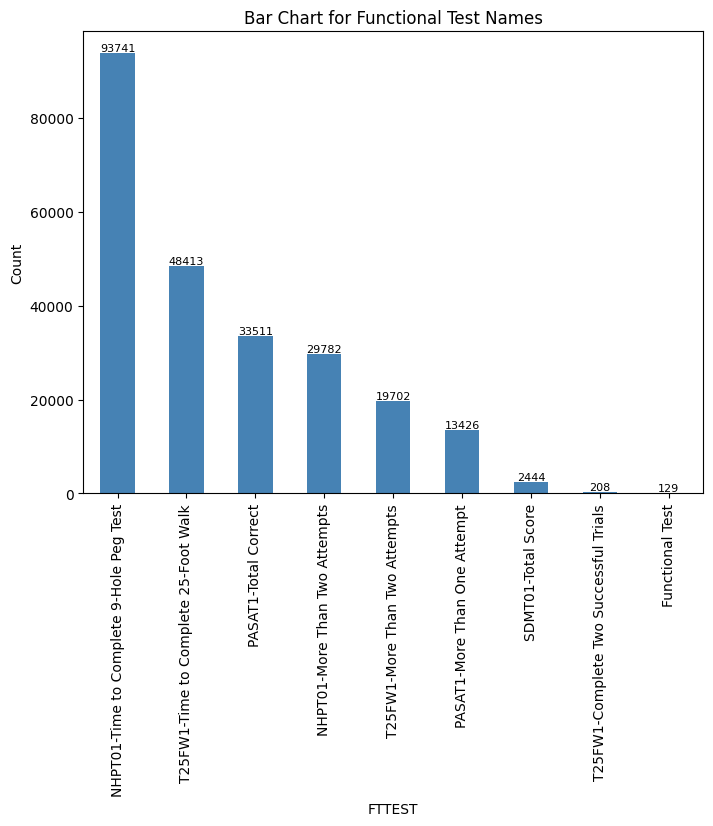

In [34]:
plt.figure(figsize=(8, 6))
ax = ftests['FTTEST'].value_counts().plot(kind='bar', color='steelblue')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), str(int(p.get_height())), ha='center', va='bottom', fontsize=8)

plt.xlabel('FTTEST')
plt.ylabel('Count')
plt.title('Bar Chart for Functional Test Names')
plt.show()

- Number of observations for each FTCAT (category of functional test) category

In [35]:
FTCAT_counts = ftests['FTCAT'].value_counts().reset_index()
FTCAT_counts.columns = ['FTCAT', 'Count']
FTCAT_counts

,FTCAT,Count
0,NHPT,123559
1,T25FW,68377
2,PASAT,46976
3,SDMT,2444


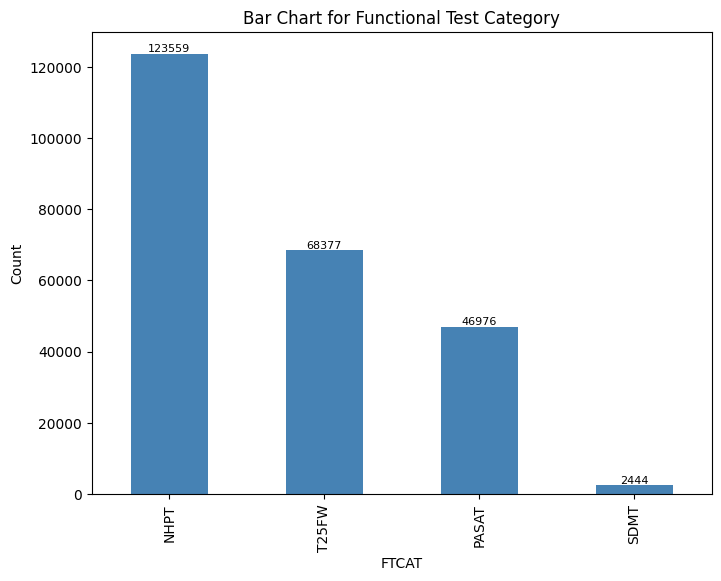

In [36]:
plt.figure(figsize=(8, 6))
ax = ftests['FTCAT'].value_counts().plot(kind='bar', color='steelblue')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), str(int(p.get_height())), ha='center', va='bottom', fontsize=8)

plt.xlabel('FTCAT')
plt.ylabel('Count')
plt.title('Bar Chart for Functional Test Category')
plt.show()

- Number of observations for each FTSCAT (subcategory of functional test) category

In [37]:
FTSCAT_counts = ftests['FTSCAT'].value_counts().reset_index()
FTSCAT_counts.columns = ['FTSCAT', 'Count']
FTSCAT_counts = FTSCAT_counts.sort_values(by='FTSCAT')
FTSCAT_counts

,FTSCAT,Count
3,2 SECONDS,10061
2,3 SECONDS,26898
0,DOMINANT HAND,61836
1,NON-DOMINANT HAND,61687


In [38]:
# Create a cross-tabulation for FTSCAT and FTTEST
cross_table = pd.crosstab(index=ftests['FTSCAT'], columns=ftests['FTTEST'])
cross_table

FTTEST,NHPT01-More Than Two Attempts,NHPT01-Time to Complete 9-Hole Peg Test,PASAT1-More Than One Attempt,PASAT1-Total Correct
FTSCAT,,,,
2 SECONDS,0,0,0,10061
3 SECONDS,0,0,3448,23450
DOMINANT HAND,14917,46919,0,0
NON-DOMINANT HAND,14865,46822,0,0


- Number of observations for each FTSTRESC (Character Result/Finding in Std Format) category

**NOTE:** This column gives the results for functional tests with both a numeric and categorical outcome. However, the numeric values are not formatted in a standardized way, only the categorical ones are. Since we already looked at the numeric outcomes in FTSTRESN, we will focus only on the categorical outcomes for this variable.

In [39]:
FTSTRESC_counts = ftests['FTSTRESC'].value_counts().reset_index()
FTSTRESC_counts.columns = ['FTSTRESC', 'Count']
FTSTRESC_counts
# contains both yes/no and numbers, should be looked at together with FTTEST!

,FTSTRESC,Count
0,N,62617
1,60,2809
2,59,2004
3,58,1709
4,57,1532
...,...,...
1664,210.5,1
1665,232.6,1
1666,354.7,1
1667,183.9,1


In [40]:
# Define the 'FTTEST' values with a categorical outcome
cat_FTTEST_values = [
    'T25FW1-Complete Two Successful Trials',
    'T25FW1-More Than Two Attempts',
    'NHPT01-More Than Two Attempts',
    'PASAT1-More Than One Attempt',
]

In [41]:
# Filter the DataFrame based on cat_FTTEST_values
filtered_ftests = ftests[ftests['FTTEST'].isin(cat_FTTEST_values)]

# Create a cross-tabulation for counts
counts_table = pd.crosstab(index=filtered_ftests['FTTEST'], columns=filtered_ftests['FTSTRESC'], margins=True, margins_name='Total')
counts_table

FTSTRESC,N,Y,Total
FTTEST,,,
NHPT01-More Than Two Attempts,29619,163,29782
PASAT1-More Than One Attempt,13368,58,13426
T25FW1-Complete Two Successful Trials,0,208,208
T25FW1-More Than Two Attempts,19630,69,19699
Total,62617,498,63115


When FTTEST = Functional Test, the outcomes are always missing. We do have the category saying which functional test it refers to, but don't know if it's time to completion or more than x attempts. 

In [42]:
functional_test_rows = ftests[ftests['FTTEST'] == 'Functional Test']
functional_test_rows

,USUBJID,FTSEQ,FTGRPID,FTTEST,FTCAT,FTSCAT,FTSTRESC,FTSTRESN,VISITNUM,VISIT,VISITDY,FTDY,FTREPNUM
176140,MSOAC/0757,138,T25FW014,Functional Test,T25FW,NaN,NaN,NaN,997.0,EARLY/TERMINATION,NaN,905.0,NaN
18756,MSOAC/1266,1,NaN,Functional Test,NHPT,NaN,NaN,NaN,-3.0,SCREENING -3,NaN,-34.0,NaN
18757,MSOAC/1266,2,PASAT001,Functional Test,PASAT,NaN,NaN,NaN,-3.0,SCREENING -3,NaN,-34.0,NaN
18770,MSOAC/1266,3,T25FW001,Functional Test,T25FW,NaN,NaN,NaN,-3.0,SCREENING -3,NaN,-34.0,NaN
152566,MSOAC/1814,101,NaN,Functional Test,NHPT,NaN,NaN,NaN,21.0,MONTH 21,NaN,624.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35718,MSOAC/9536,13,T25FW002,Functional Test,T25FW,NaN,NaN,NaN,-2.0,SCREENING -2,NaN,-14.0,NaN
156434,MSOAC/9572,105,T25FW010,Functional Test,T25FW,NaN,NaN,NaN,21.0,MONTH 21,NaN,642.0,NaN
63985,MSOAC/9781,25,T25FW010,Functional Test,T25FW,NaN,NaN,NaN,9.2,VISIT 7: HOUR 1,NaN,64.0,NaN
64060,MSOAC/9781,26,T25FW011,Functional Test,T25FW,NaN,NaN,NaN,9.3,VISIT 7: HOUR 2,NaN,64.0,NaN


In [43]:
unique_FTSTRESN = functional_test_rows['FTSTRESN'].unique()
unique_FTSTRESC = functional_test_rows['FTSTRESC'].unique()

print(f"Unique FTSTRESN values: {unique_FTSTRESN}")
print(f"\nUnique FTSTRESC values: {unique_FTSTRESC}")


Unique FTSTRESN values: [nan]

Unique FTSTRESC values: [nan]


In [44]:
(129/len(ftests))*100 #only 0.05% - can we just remove these obs?

0.05344801869437677

We will remove these observations because they do not provide any information (all missing and don't know which outcome is recorded).

In [45]:
# Filter rows where 'FTTEST' is not equal to 'Functional Test'
ftests = ftests[ftests['FTTEST'] != 'Functional Test']

Also remove more than x attempts for reasons I need to write out (investigation in Excel) - REMOVE THESE BUT NEED TO EXPLAIN WHY

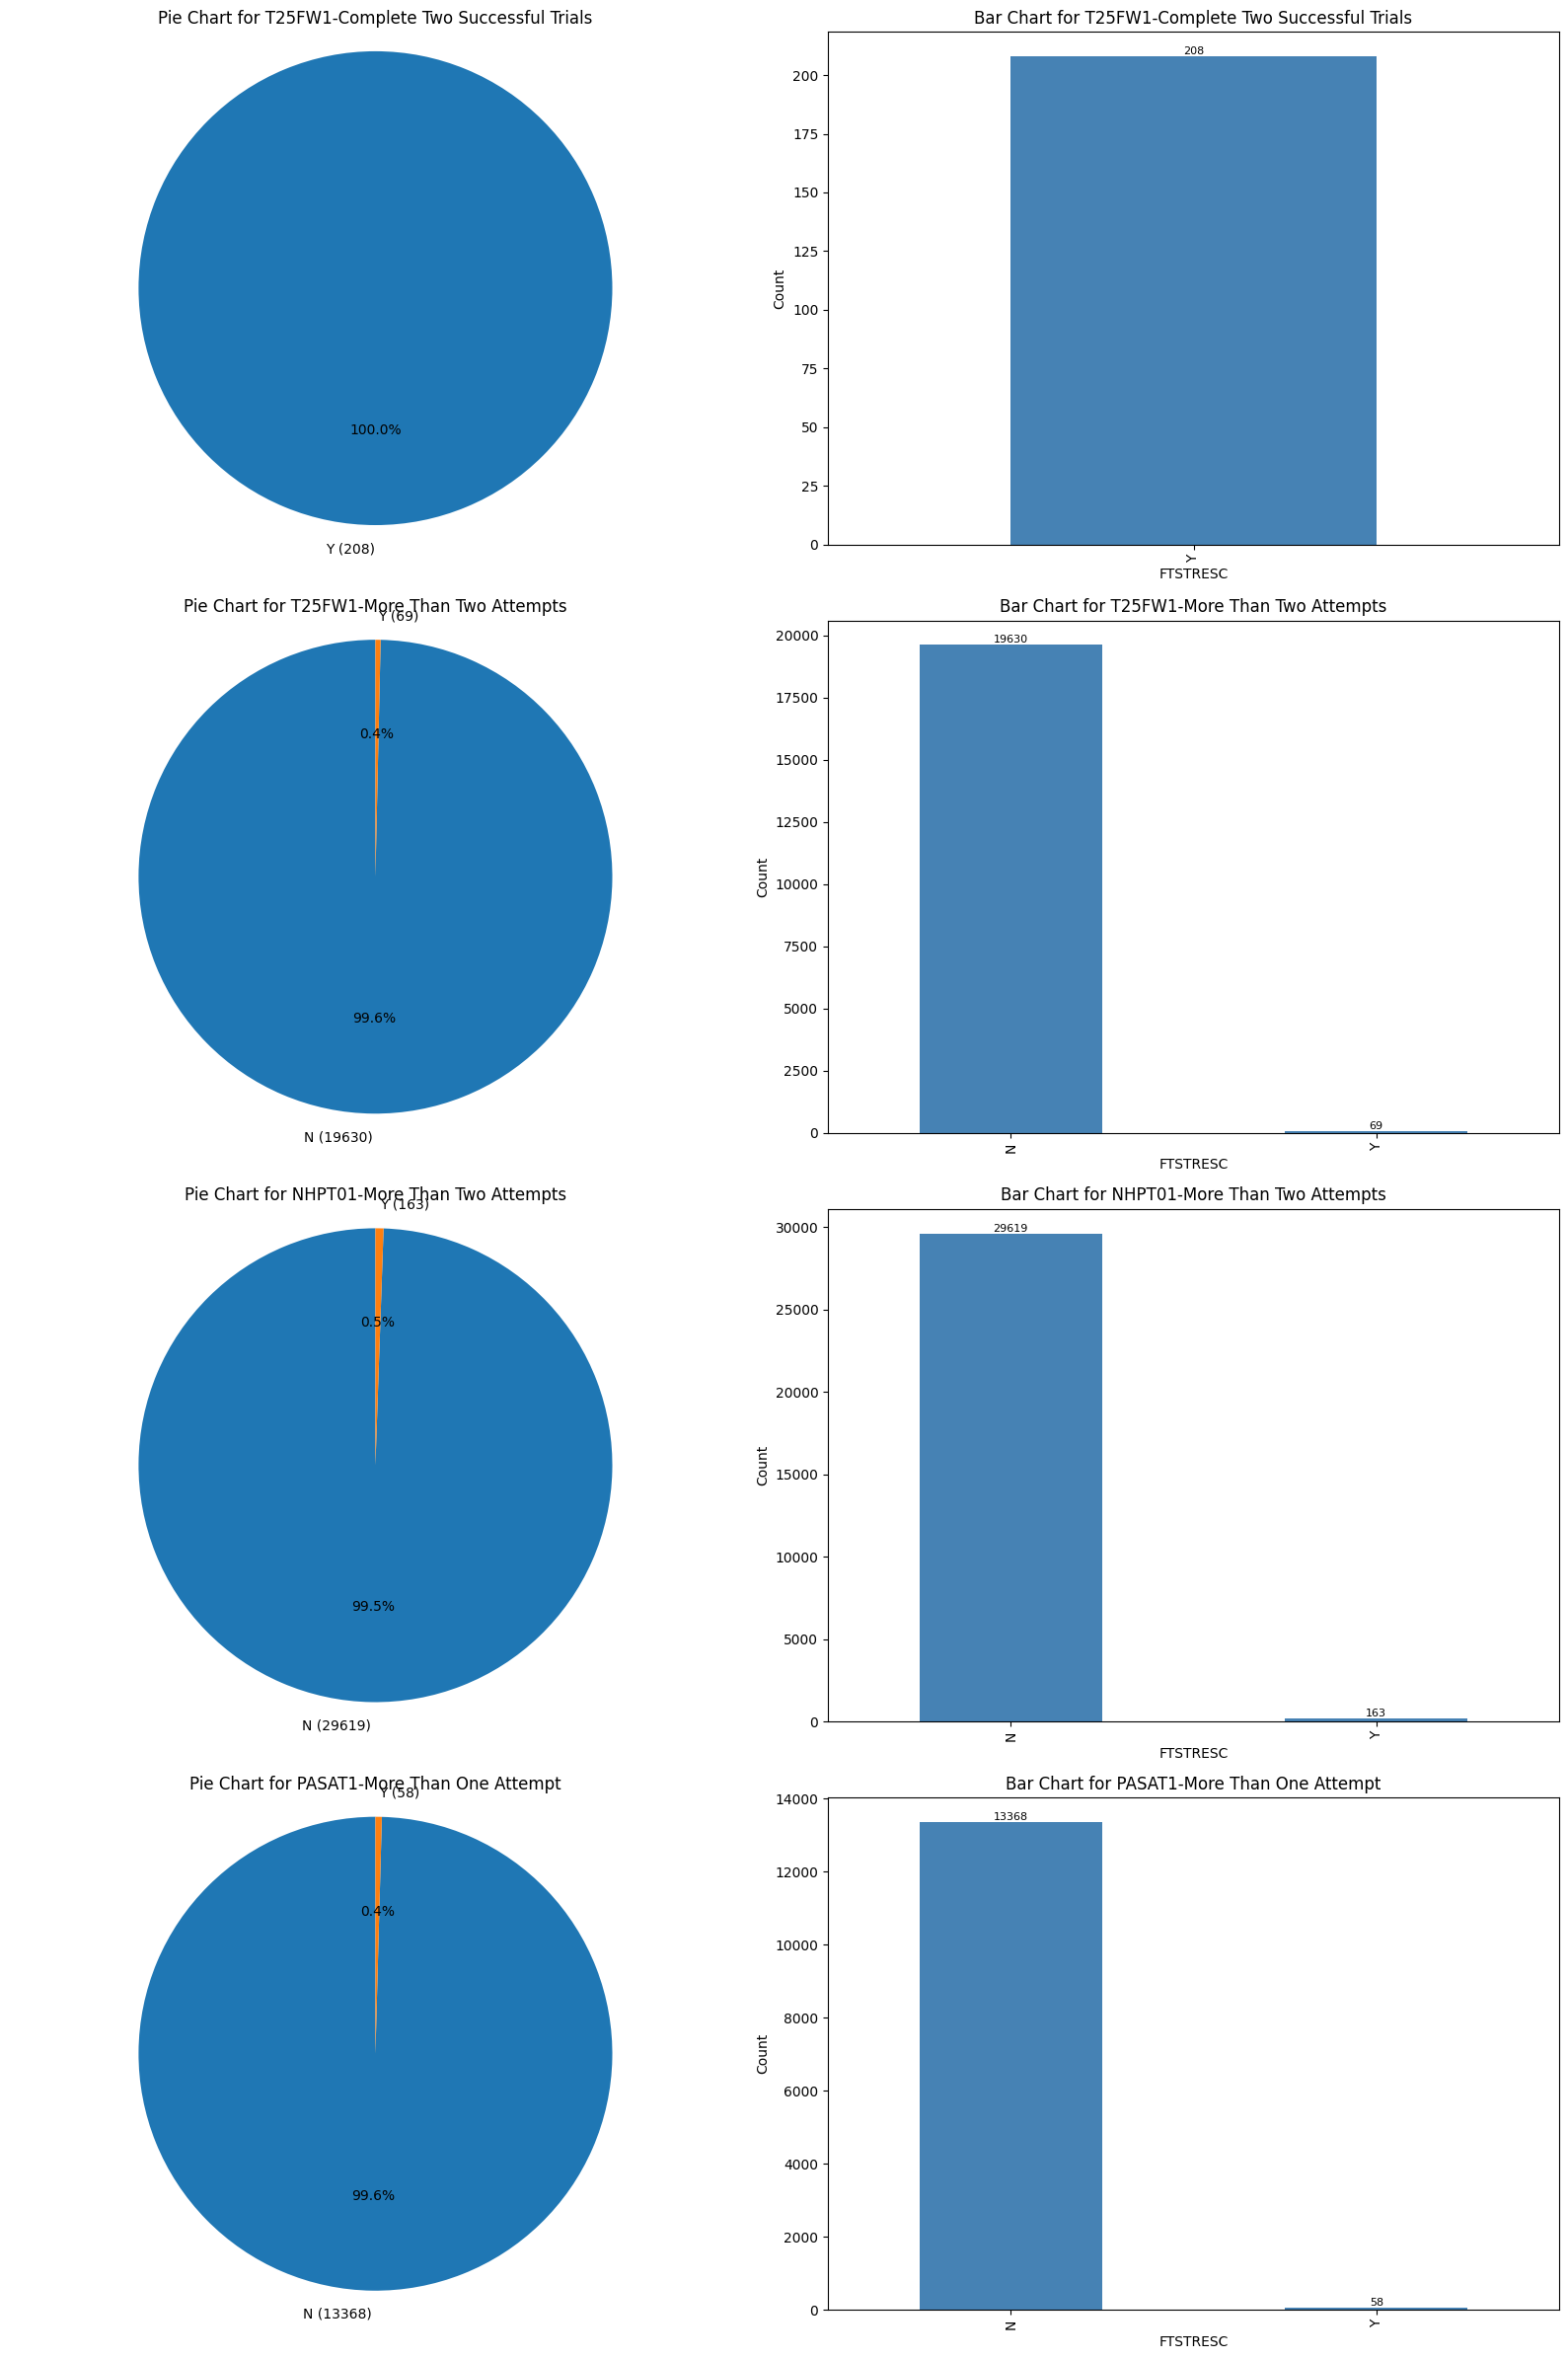

In [46]:
fig, axes = plt.subplots(nrows=len(cat_FTTEST_values), ncols=2, figsize=(16, 6 * len(cat_FTTEST_values)))

# Iterate over categorical FTTEST values
for i, fttest_value in enumerate(cat_FTTEST_values):
    subset_data_fttest = ftests[ftests['FTTEST'] == fttest_value]
    
    # Pie chart for FTSTRESC
    category_counts_ftstresc = subset_data_fttest['FTSTRESC'].value_counts()
    if not category_counts_ftstresc.empty:
        percentages = category_counts_ftstresc / category_counts_ftstresc.sum() * 100
        labels = [f"{category} ({count})" for category, count in zip(category_counts_ftstresc.index, category_counts_ftstresc)]
        
        axes[i, 0].pie(percentages, labels=labels, autopct='%1.1f%%', startangle=90)
        axes[i, 0].axis('equal')
        axes[i, 0].set_title(f'Pie Chart for {fttest_value}')

    # Bar chart for FTSTRESC
    if not category_counts_ftstresc.empty:
        ax = subset_data_fttest['FTSTRESC'].value_counts().plot(kind='bar', color='steelblue', ax=axes[i, 1])
        for p in ax.patches:
            ax.text(p.get_x() + p.get_width() / 2., p.get_height(), str(int(p.get_height())), ha='center', va='bottom', fontsize=8)
        axes[i, 1].set_xlabel('FTSTRESC')
        axes[i, 1].set_ylabel('Count')
        axes[i, 1].set_title(f'Bar Chart for {fttest_value}')

plt.tight_layout()
plt.show()

- Number of observations for each VISIT (Visit Name) category 

In [47]:
VISIT_counts = ftests['VISIT'].value_counts().reset_index()
VISIT_counts.columns = ['VISIT', 'Count']
VISIT_counts

,VISIT,Count
0,SCREENING,17056
1,BASELINE,12829
2,V1 - SCREENING,8211
3,WEEK 12,7847
4,WEEK 24,7670
...,...,...
94,WEEK 128,35
95,RELAPSE VISIT 4,34
96,MONTH 48,30
97,RELAPSE VISIT 5,23


### Irregular time points of measurements?

In [48]:
# Drop rows with missing values in the 'FTDY' column
ftests_cleaned = ftests.dropna(subset=['FTDY'])

# Group by subject ID and extract unique FTDY values for each patient
unique_ftdy_values = ftests_cleaned.groupby('USUBJID')['FTDY'].unique()
unique_ftdy_values

USUBJID
MSOAC/0016    [-21.0, -14.0, -7.0, 1.0, 15.0, 28.0, 43.0, 57...
MSOAC/0019    [-27.0, -20.0, -13.0, 1.0, 93.0, 184.0, 263.0,...
MSOAC/0024    [-27.0, -21.0, -13.0, 1.0, 95.0, 179.0, 263.0,...
MSOAC/0030              [-33.0, -19.0, 1.0, 85.0, 171.0, 253.0]
MSOAC/0031    [-28.0, -14.0, -8.0, 1.0, 85.0, 165.0, 253.0, ...
                                    ...                        
MSOAC/9980    [-33.0, -25.0, -8.0, 1.0, 85.0, 169.0, 253.0, ...
MSOAC/9981    [-26.0, 1.0, 36.0, 64.0, 92.0, 176.0, 211.0, 2...
MSOAC/9985    [-27.0, -20.0, -8.0, 1.0, 85.0, 170.0, 261.0, ...
MSOAC/9986        [-36.0, -13.0, -7.0, 1.0, 85.0, 177.0, 252.0]
MSOAC/9998    [-28.0, -14.0, -7.0, 1.0, 85.0, 190.0, 274.0, ...
Name: FTDY, Length: 1692, dtype: object

In [49]:
# Calculate the differences between subsequent FTDY values for each patient
differences = unique_ftdy_values.apply(lambda x: pd.Series(x).diff().dropna())
differences

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
USUBJID,,,,,,,,,,,,,,,,,,
MSOAC/0016,7.0,7.0,8.0,14.0,13.0,15.0,14.0,7.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MSOAC/0019,7.0,7.0,14.0,92.0,91.0,79.0,97.0,91.0,91.0,84.0,98.0,84.0,91.0,90.0,99.0,NaN,NaN,NaN
MSOAC/0024,6.0,8.0,14.0,94.0,84.0,84.0,77.0,77.0,84.0,95.0,71.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MSOAC/0030,14.0,20.0,84.0,86.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MSOAC/0031,14.0,6.0,9.0,84.0,80.0,88.0,84.0,84.0,84.0,84.0,84.0,77.0,86.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MSOAC/9980,8.0,17.0,9.0,84.0,84.0,84.0,84.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MSOAC/9981,27.0,35.0,28.0,28.0,84.0,35.0,28.0,28.0,84.0,92.0,91.0,90.0,91.0,NaN,NaN,NaN,NaN,NaN
MSOAC/9985,7.0,12.0,9.0,84.0,85.0,91.0,77.0,85.0,84.0,84.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
# Calculate the average difference for each patient
average_difference = differences.mean(axis=1)

# Combine the results into a DataFrame
result_df = pd.DataFrame({'Average_Difference': average_difference})
result_df

,Average_Difference
USUBJID,
MSOAC/0016,11.000000
MSOAC/0019,74.333333
MSOAC/0024,63.090909
MSOAC/0030,57.200000
MSOAC/0031,66.461538
...,...
MSOAC/9980,52.857143
MSOAC/9981,57.000000
MSOAC/9985,63.181818


In [51]:
unique_values_count = result_df['Average_Difference'].nunique()
print("Number of unique values in 'Average_Difference':", unique_values_count)

Number of unique values in 'Average_Difference': 647


In [52]:
# Calculate the average and standard deviation over all patients
overall_avg_difference = result_df['Average_Difference'].mean()
overall_std_deviation = result_df['Average_Difference'].std()
print(f"Overall Average Difference: {overall_avg_difference}")
print(f"Overall Standard Deviation: {overall_std_deviation}")

Overall Average Difference: 62.56224159769216
Overall Standard Deviation: 17.62677578017978


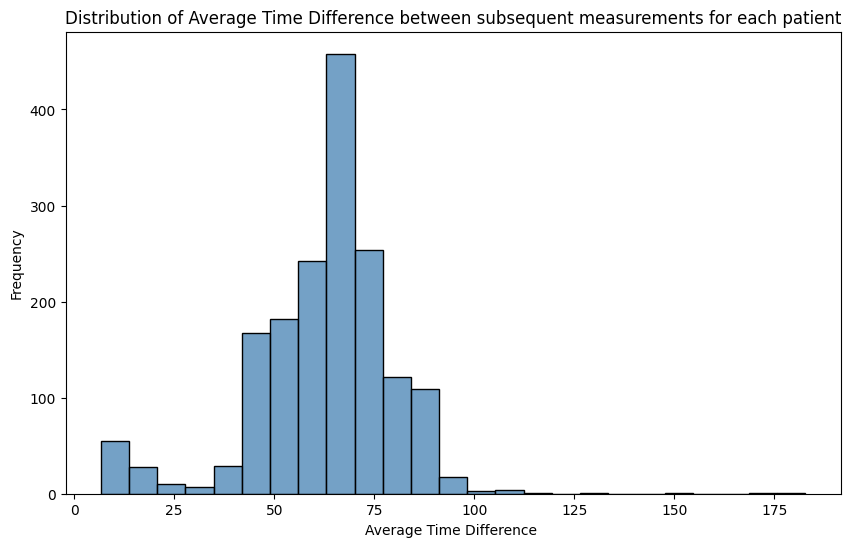

In [53]:
# Calculate the 95% confidence interval
ci_lower = overall_avg_difference - 1.96 * overall_std_deviation
ci_upper = overall_avg_difference + 1.96 * overall_std_deviation

# Plot the histogram with the 95% confidence interval
plt.figure(figsize=(10, 6))
sns.histplot(result_df['Average_Difference'], bins=25, kde=False, color='steelblue')

# Add vertical lines for the confidence interval
#plt.axvline(ci_lower, color='red', linestyle='--', label='95% CI')
#plt.axvline(ci_upper, color='red', linestyle='--')

# Set the title and labels
plt.title('Distribution of Average Time Difference between subsequent measurements for each patient')
plt.xlabel('Average Time Difference ')
plt.ylabel('Frequency')

# Show the plot
plt.show()

### Create a static dataframe

In [54]:
FTDY.describe()

count    181487.000000
mean        263.082551
std         295.597788
min       -1138.000000
25%           1.000000
50%         173.000000
75%         456.000000
max        1404.000000
Name: FTDY, dtype: float64

The day of test ranges from approximately 3 years before study start until approximately 4 years after study start. 

In [55]:
filtered_rows = ftests[ftests['FTTEST'].isin(num_FTTEST_values)]

# Calculate the percentage of missing values for the 'FTDY' column for each outcome (each value in 'FTTEST') 
missing_percentages = filtered_rows.groupby('FTTEST')['FTDY'].apply(lambda x: (x.isnull().sum() / len(x)) * 100)
print("Missing percentage of study day for each outcome:")
print(missing_percentages.round(2))

Missing percentage of study day for each outcome:
FTTEST
NHPT01-Time to Complete 9-Hole Peg Test    25.66
PASAT1-Total Correct                       18.01
SDMT01-Total Score                          0.00
T25FW1-Time to Complete 25-Foot Walk       24.92
Name: FTDY, dtype: float64


In [56]:
filtered_rows.head()

,USUBJID,FTSEQ,FTGRPID,FTTEST,FTCAT,FTSCAT,FTSTRESC,FTSTRESN,VISITNUM,VISIT,VISITDY,FTDY,FTREPNUM
193389,MSOAC/0014,1,T25FW001,T25FW1-Time to Complete 25-Foot Walk,T25FW,NaN,4.5,4.5,2.0,BASELINE,NaN,NaN,1.0
193354,MSOAC/0014,2,T25FW001,T25FW1-Time to Complete 25-Foot Walk,T25FW,NaN,4.4,4.4,2.0,BASELINE,NaN,NaN,2.0
192233,MSOAC/0014,4,NHPT001,NHPT01-Time to Complete 9-Hole Peg Test,NHPT,DOMINANT HAND,25.6,25.6,2.0,BASELINE,NaN,NaN,1.0
191936,MSOAC/0014,5,NHPT001,NHPT01-Time to Complete 9-Hole Peg Test,NHPT,DOMINANT HAND,23.7,23.7,2.0,BASELINE,NaN,NaN,2.0
192099,MSOAC/0014,7,NHPT001,NHPT01-Time to Complete 9-Hole Peg Test,NHPT,NON-DOMINANT HAND,24.6,24.6,2.0,BASELINE,NaN,NaN,1.0


according to a paper, the convention for patients unable to perform is: 180 sec for T25FW & 300 sec for 9HPT - but in this dataset there are some values even larger than this

check how many values there are with such a value

In [57]:
# Filter rows based on conditions
extreme_rows = filtered_rows.loc[(filtered_rows['FTCAT'] == 'T25FW') & (filtered_rows['FTSTRESN'] > 180)]

# Get the number of rows
num_rows = len(extreme_rows)

# Get the number of unique USUBJID values
num_unique_usubjid = len(extreme_rows['USUBJID'].unique())

# Print the results
print("Number of rows with time to complete T25FW > 180 seconds:", num_rows)
print("Number of unique patients with time to complete T25FW > 180 seconds:", num_unique_usubjid)

Number of rows with time to complete T25FW > 180 seconds: 40
Number of unique patients with time to complete T25FW > 180 seconds: 14


In [58]:
# Filter rows based on conditions
extreme_rows = filtered_rows.loc[(filtered_rows['FTCAT'] == 'NHPT') & (filtered_rows['FTSTRESN'] > 300)]

# Get the number of rows
num_rows = len(extreme_rows)

# Get the number of unique USUBJID values
num_unique_usubjid = len(extreme_rows['USUBJID'].unique())

# Print the results
print("Number of rows with time to complete NHPT > 300 seconds:", num_rows)
print("Number of unique patients with time to complete NHPT > 300 seconds:", num_unique_usubjid)

Number of rows with time to complete NHPT > 300 seconds: 50
Number of unique patients with time to complete NHPT > 300 seconds: 19


Since there's not many cases for which this happens, we can use the truncation from the literature. (it won't result in a spike)

In [59]:
# Update FTSTRESN for rows where FTCAT is T25FW and FTSTRESN > 180
filtered_rows.loc[(filtered_rows['FTCAT'] == 'T25FW') & (filtered_rows['FTSTRESN'] > 180), 'FTSTRESN'] = 180

# Update FTSTRESN for rows where FTCAT is NHPT and FTSTRESN > 300
filtered_rows.loc[(filtered_rows['FTCAT'] == 'NHPT') & (filtered_rows['FTSTRESN'] > 300), 'FTSTRESN'] = 300

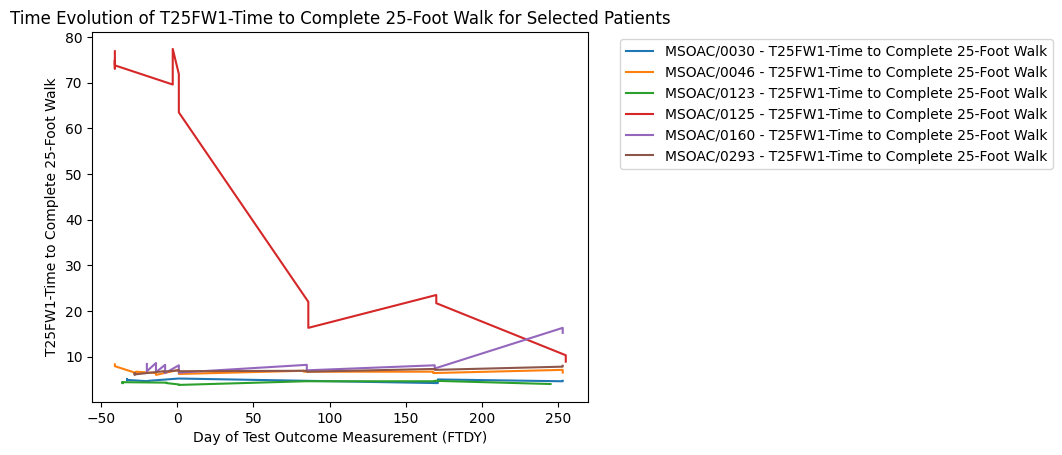

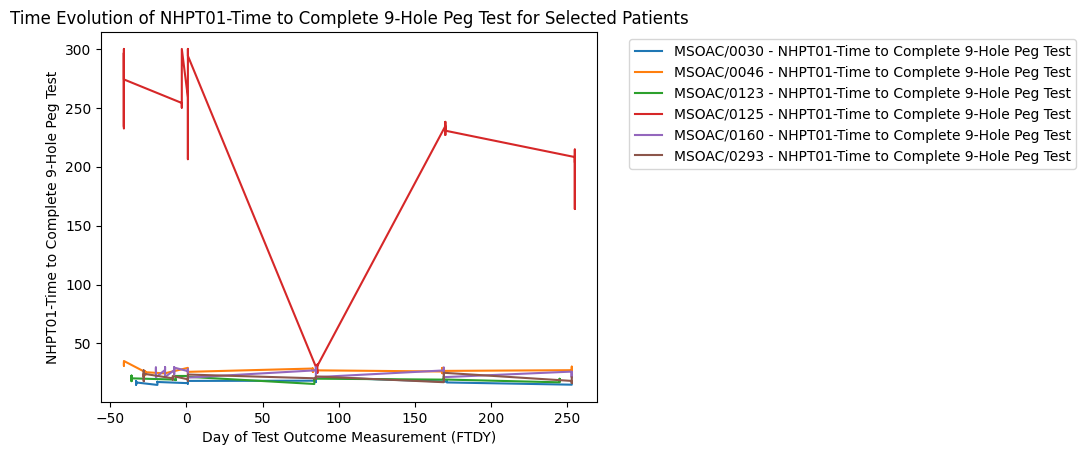

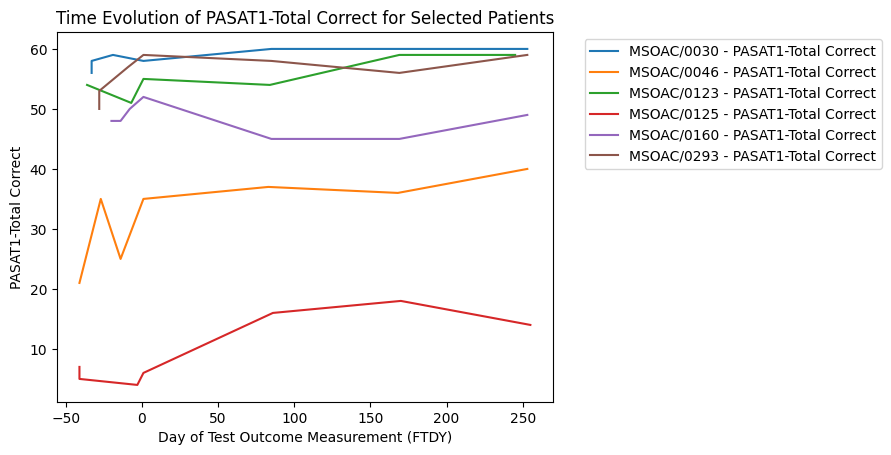

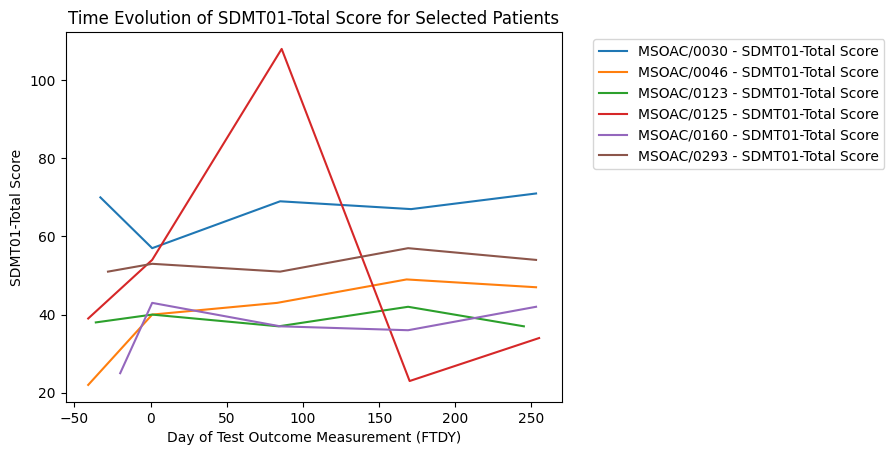

In [60]:
# Select a few patients (replace 'selected_patients' with the actual USUBJID values you are interested in)
selected_patients = ['MSOAC/0030', 'MSOAC/0046', 'MSOAC/0123', 'MSOAC/0125', 'MSOAC/0160', 'MSOAC/0293']

# Get unique values of FTTEST
unique_fttests = filtered_rows['FTTEST'].unique()

# Plot the time evolution for each unique value of FTTEST
for fttest_value in unique_fttests:
    # Filter data for the current FTTEST value
    filtered_ftests = filtered_rows[filtered_rows['FTTEST'] == fttest_value]
    
    # Plot for selected patients
    for patient_id in selected_patients:
        patient_data = filtered_ftests[filtered_ftests['USUBJID'] == patient_id]
        plt.plot(patient_data['FTDY'], patient_data['FTSTRESN'], label=f'{patient_id} - {fttest_value}')

    # Customize the plot
    plt.xlabel('Day of Test Outcome Measurement (FTDY)')
    plt.ylabel(f'{fttest_value}')
    plt.title(f'Time Evolution of {fttest_value} for Selected Patients')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Move the legend outside of the figure
    plt.show()

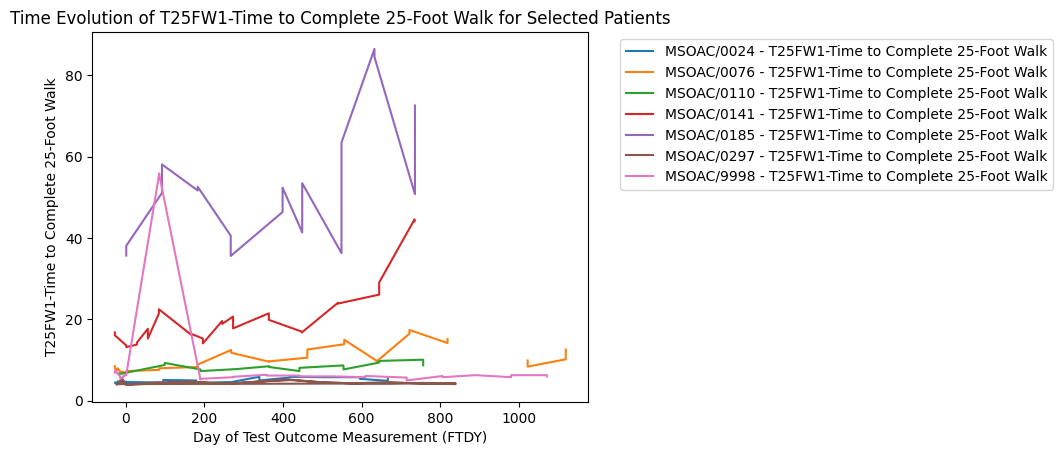

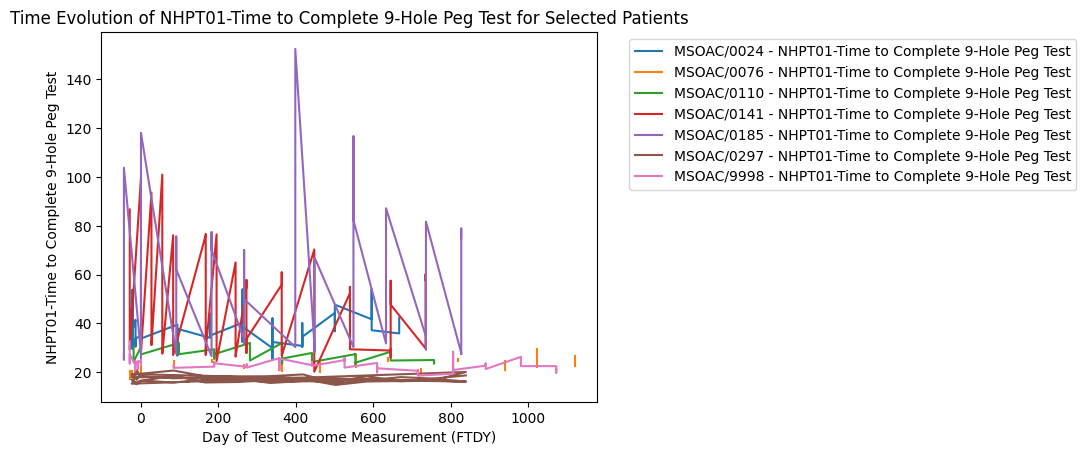

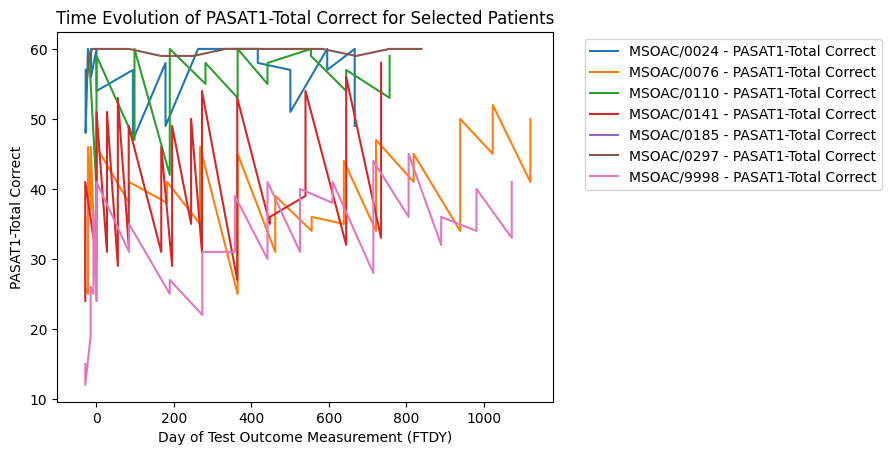

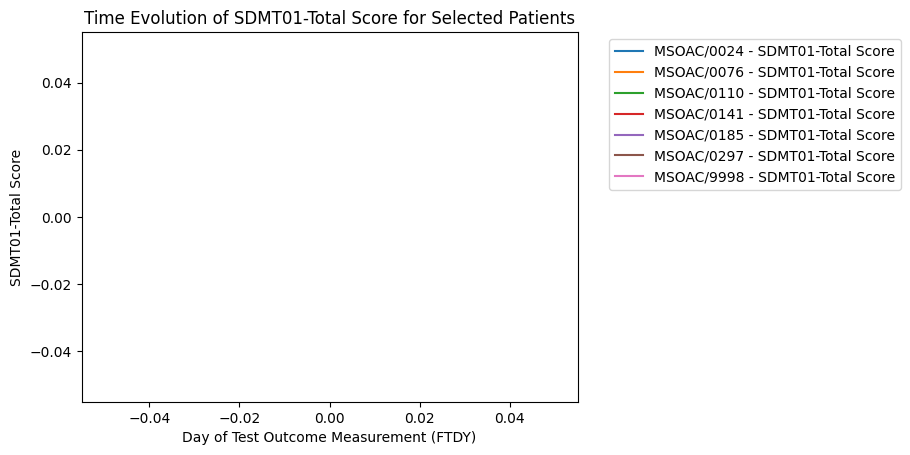

In [61]:
# Select a few patients (replace 'selected_patients' with the actual USUBJID values you are interested in)
selected_patients = ['MSOAC/0024', 'MSOAC/0076', 'MSOAC/0110', 'MSOAC/0141', 'MSOAC/0185', 'MSOAC/0297', 'MSOAC/9998']

# Get unique values of FTTEST
unique_fttests = filtered_rows['FTTEST'].unique()

# Plot the time evolution for each unique value of FTTEST
for fttest_value in unique_fttests:
    # Filter data for the current FTTEST value
    filtered_ftests = filtered_rows[filtered_rows['FTTEST'] == fttest_value]
    
    # Plot for selected patients
    for patient_id in selected_patients:
        patient_data = filtered_ftests[filtered_ftests['USUBJID'] == patient_id]
        plt.plot(patient_data['FTDY'], patient_data['FTSTRESN'], label=f'{patient_id} - {fttest_value}')

    # Customize the plot
    plt.xlabel('Day of Test Outcome Measurement (FTDY)')
    plt.ylabel(f'{fttest_value}')
    plt.title(f'Time Evolution of {fttest_value} for Selected Patients')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Move the legend outside of the figure
    plt.show()

In [62]:
# Check the number of unique patients for each value of FTTEST
unique_patients_per_FTTEST = filtered_rows.groupby('FTTEST')['USUBJID'].nunique()

# Display the result
print("Number of unique patients for each value of FTTEST:")
print(unique_patients_per_FTTEST)

Number of unique patients for each value of FTTEST:
FTTEST
NHPT01-Time to Complete 9-Hole Peg Test    2394
PASAT1-Total Correct                       2394
SDMT01-Total Score                          500
T25FW1-Time to Complete 25-Foot Walk       2465
Name: USUBJID, dtype: int64


In [63]:
# Get unique values of FTTEST column
unique_fttest_values = filtered_rows['FTTEST'].unique()

# Initialize a list to store the result DataFrames for each unique FTTEST value
result_dfs = []

# Iterate over each unique FTTEST value
for fttest_value in unique_fttest_values:
    # Filter rows for the current FTTEST value
    filtered_rows_fttest = filtered_rows[filtered_rows['FTTEST'] == fttest_value]
    
    # Drop rows with missing values in the 'FTDY' column
    filtered_rows_fttest_cleaned = filtered_rows_fttest.dropna(subset=['FTDY'])
    
    # Group by subject ID and extract unique FTDY values for each patient
    unique_ftdy_values = filtered_rows_fttest_cleaned.groupby('USUBJID')['FTDY'].unique()
    
    # Calculate the differences between subsequent FTDY values for each patient
    differences = unique_ftdy_values.apply(lambda x: pd.Series(x).diff().dropna())
    
    # Calculate the average difference for each patient
    average_difference = differences.mean(axis=1)
    
    # Combine the results into a DataFrame
    result_df = pd.DataFrame({'Average_Difference': average_difference})
    
    # Calculate the average and standard deviation over all patients
    overall_avg_difference = result_df['Average_Difference'].mean()
    overall_std_deviation = result_df['Average_Difference'].std()
    
    # Print the results
    print(f"For FTTEST value '{fttest_value}':")
    print(f"Overall Average Difference: {overall_avg_difference}")
    print(f"Overall Standard Deviation: {overall_std_deviation}")
    print(f'\n')
    
    # Append the result DataFrame to the list
    result_dfs.append(result_df)

# Concatenate all result DataFrames into a single DataFrame
result_df_combined = pd.concat(result_dfs)

For FTTEST value 'T25FW1-Time to Complete 25-Foot Walk':
Overall Average Difference: 62.68684331624856
Overall Standard Deviation: 17.776778574263954


For FTTEST value 'NHPT01-Time to Complete 9-Hole Peg Test':
Overall Average Difference: 64.83619320229306
Overall Standard Deviation: 14.3356230034877


For FTTEST value 'PASAT1-Total Correct':
Overall Average Difference: 64.85453434874765
Overall Standard Deviation: 14.65391061461187


For FTTEST value 'SDMT01-Total Score':
Overall Average Difference: 70.29773333333334
Overall Standard Deviation: 8.223099187617018




Check separately before study start, 2 years after study start & 4 years after study start - how many observations are there for each test outcome? (rather than the entire dataframe, to see if it makes sense to take an average or maximum of a particular score for that particular time period)

NOTE: they said the number of observations per time period doesn't matter, u will just assume that if u only have 1 or 2 that these are representative for that certain time period which is not an unusual assumption to make (meeting) because reason for aggregating is not for averaging out outlying values, we just want to limit the number of columns so it doesn't matter how many measurements u actually have 

In [64]:
# Create subsets for different time periods
before_study_start = ftests[ftests['FTDY'] <= 1]
two_years_after_start = ftests[(ftests['FTDY'] > 1) & (ftests['FTDY'] <= 730)]
four_years_after_start = ftests[ftests['FTDY'] > 730]

# Function to count observations for a given subset
def count_observations(subset, title):
    filtered_rows = subset[subset['FTTEST'].isin(num_FTTEST_values)]
    outcome_measure_counts = filtered_rows.groupby(['FTTEST', 'USUBJID']).size().reset_index(name='Observation_Count')
    
    print(f"\n{title}")
    return outcome_measure_counts.groupby('FTTEST')['Observation_Count'].describe()

# Apply the function for each time period
count_observations(before_study_start, 'Before Study Start')


Before Study Start


,count,mean,std,min,25%,50%,75%,max
FTTEST,,,,,,,,
NHPT01-Time to Complete 9-Hole Peg Test,1622.0,14.416769,3.154295,4.0,16.0,16.0,16.0,17.0
PASAT1-Total Correct,1622.0,5.267571,1.876488,2.0,4.0,4.0,8.0,8.0
SDMT01-Total Score,499.0,1.977956,0.146974,1.0,2.0,2.0,2.0,2.0
T25FW1-Time to Complete 25-Foot Walk,1691.0,7.235955,1.566448,2.0,8.0,8.0,8.0,10.0


In [65]:
count_observations(two_years_after_start, 'First 2 Years After Study Start')


First 2 Years After Study Start


,count,mean,std,min,25%,50%,75%,max
FTTEST,,,,,,,,
NHPT01-Time to Complete 9-Hole Peg Test,1610.0,24.651553,10.372297,4.0,12.0,32.0,32.0,60.0
PASAT1-Total Correct,1610.0,10.035404,6.104690,1.0,3.0,8.0,16.0,30.0
SDMT01-Total Score,496.0,2.937500,0.442816,1.0,3.0,3.0,3.0,4.0
T25FW1-Time to Complete 25-Foot Walk,1679.0,12.396665,5.107884,2.0,6.0,16.0,16.0,30.0


In [66]:
count_observations(four_years_after_start, 'More Than 2 Years After Study Start')


More Than 2 Years After Study Start


,count,mean,std,min,25%,50%,75%,max
FTTEST,,,,,,,,
NHPT01-Time to Complete 9-Hole Peg Test,648.0,10.203704,5.375126,4.0,8.0,8.0,16.0,32.0
PASAT1-Total Correct,648.0,4.279321,3.158474,2.0,2.0,2.0,8.0,16.0
T25FW1-Time to Complete 25-Foot Walk,645.0,5.114729,2.675374,2.0,4.0,4.0,8.0,16.0


Based on this, we will keep the split for all numeric test outcomes except for the SDMT. For this one we will just look at the entirety of the dataset. -- actually might also keep split for SDMT since number of observations per time bin doesn't matter

use disjoint time bins because we want to allow for improvements over time and a min/max up until a time period will no longer allow for improvement in performance

DO KEEP MEDIAN FOR NOW BECAUSE NOT ALWAYS SAME NR OF MEASUREMENTS IN TIME BINS FOR EACH TEST!

In [67]:
# Filter the DataFrame to include only the specified FTTEST values
filtered_rows #contains only numeric FTTEST VALUES =

conditions = [
    (filtered_rows['FTDY'] <= 1),
    ((filtered_rows['FTDY'] > 1) & (filtered_rows['FTDY'] <= 730)),
    (filtered_rows['FTDY'] > 730)
]

# Define corresponding values for each condition
values = ['before', '2y', 'after_2y']

# Create the new column "FT_PERIOD"
filtered_rows['FT_PERIOD'] = np.select(conditions, values, default='NaN')
filtered_rows = filtered_rows.dropna(subset=['FTDY']) #Drop observations for which we don't have time of test - note that ~700 patients don't have the time recorded so they will only have NAs
filtered_rows.head()

C:\Users\lenne\AppData\Local\Temp\ipykernel_12064\3057511333.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_rows['FT_PERIOD'] = np.select(conditions, values, default='NaN')


,USUBJID,FTSEQ,FTGRPID,FTTEST,FTCAT,FTSCAT,FTSTRESC,FTSTRESN,VISITNUM,VISIT,VISITDY,FTDY,FTREPNUM,FT_PERIOD
30622,MSOAC/0016,2,T25FW001,T25FW1-Time to Complete 25-Foot Walk,T25FW,NaN,9.4,9.4,1.0,SCREENING,NaN,-21.0,1.0,before
30626,MSOAC/0016,3,T25FW001,T25FW1-Time to Complete 25-Foot Walk,T25FW,NaN,9.7,9.7,1.0,SCREENING,NaN,-21.0,2.0,before
37116,MSOAC/0016,5,T25FW002,T25FW1-Time to Complete 25-Foot Walk,T25FW,NaN,8.3,8.3,2.0,VISIT 0,NaN,-14.0,1.0,before
37121,MSOAC/0016,6,T25FW002,T25FW1-Time to Complete 25-Foot Walk,T25FW,NaN,8.6,8.6,2.0,VISIT 0,NaN,-14.0,2.0,before
42339,MSOAC/0016,8,T25FW003,T25FW1-Time to Complete 25-Foot Walk,T25FW,NaN,7.9,7.9,3.0,VISIT 1,NaN,-7.0,1.0,before


Note that we need to make a distinction between the 2 and 3 second versions of the PASAT test because one version is a bit easier than the other, so a comparison would be unfair. The same goes for the NHPT which can be done with one's dominant or non-dominant hand. However, since the distribution between (non-)dominant hand is balanced, we don't take this into account. For PASAT however, the distribution between the 2 and 3 second version is unbalanced, so we will make the distinction between both versions of the test. 

DO TAKE INTO ACCOUNT FOR NHPT AS WELL BECAUSE WE TAKE THE MINIMUM TIME TO COMPLETE / WORST PERFORMANCE (it didnt matter for median because of balanced distribution)

In [68]:
# Replace 'PASAT' with 'PASAT_2S' when 'FTCAT' is 'PASAT' and 'FTSCAT' is 2
filtered_rows.loc[(filtered_rows['FTCAT'] == 'PASAT') & (filtered_rows['FTSCAT'] == '2 SECONDS'), 'FTCAT'] = 'PASAT_2s'

# Replace 'PASAT' with 'PASAT_3S' when 'FTCAT' is 'PASAT' and 'FTSCAT' is 3
filtered_rows.loc[(filtered_rows['FTCAT'] == 'PASAT') & (filtered_rows['FTSCAT'] == '3 SECONDS'), 'FTCAT'] = 'PASAT_3s'


### FOR NOW WE DONT MAKE THE SPLIT BECAUSE SOMETIMES PPL PERFORM BETTER WITH THEIR DOM HAND SOMETIMES NON DOM HAND (because you do both always)
''' 
# Replace 'NHPT' with 'NHPT_ND' when 'FTCAT' is 'NHPT' and 'FTSCAT' is NON-DOMINANT HAND
filtered_rows.loc[(filtered_rows['FTCAT'] == 'NHPT') & (filtered_rows['FTSCAT'] == 'NON-DOMINANT HAND'), 'FTCAT'] = 'NHPT_ND'

# Replace 'NHPT' with 'NHPT_D' when 'FTCAT' is 'NHPT' and 'FTSCAT' is DOMINANT HAND
filtered_rows.loc[(filtered_rows['FTCAT'] == 'NHPT') & (filtered_rows['FTSCAT'] == 'DOMINANT HAND'), 'FTCAT'] = 'NHPT_D'
'''

" \n# Replace 'NHPT' with 'NHPT_ND' when 'FTCAT' is 'NHPT' and 'FTSCAT' is NON-DOMINANT HAND\nfiltered_rows.loc[(filtered_rows['FTCAT'] == 'NHPT') & (filtered_rows['FTSCAT'] == 'NON-DOMINANT HAND'), 'FTCAT'] = 'NHPT_ND'\n\n# Replace 'NHPT' with 'NHPT_D' when 'FTCAT' is 'NHPT' and 'FTSCAT' is DOMINANT HAND\nfiltered_rows.loc[(filtered_rows['FTCAT'] == 'NHPT') & (filtered_rows['FTSCAT'] == 'DOMINANT HAND'), 'FTCAT'] = 'NHPT_D'\n"

In [69]:
'''
# Check for at least one of the conditions being true
at_least_one_condition = (
    (result_df['NHPT_D-before'] > result_df['NHPT_ND-before']) |
    (result_df['NHPT_D-2y'] > result_df['NHPT_ND-2y']) |
    (result_df['NHPT_D-after_2y'] > result_df['NHPT_ND-after_2y'])
)

# Count the number of rows where at least one condition is true
num_rows_with_condition = len(result_df[at_least_one_condition])

# Print the result
print("Number of rows with at least one true condition:", num_rows_with_condition)
'''

'\n# Check for at least one of the conditions being true\nat_least_one_condition = (\n    (result_df[\'NHPT_D-before\'] > result_df[\'NHPT_ND-before\']) |\n    (result_df[\'NHPT_D-2y\'] > result_df[\'NHPT_ND-2y\']) |\n    (result_df[\'NHPT_D-after_2y\'] > result_df[\'NHPT_ND-after_2y\'])\n)\n\n# Count the number of rows where at least one condition is true\nnum_rows_with_condition = len(result_df[at_least_one_condition])\n\n# Print the result\nprint("Number of rows with at least one true condition:", num_rows_with_condition)\n'

It's not always the non-dominant hand that has the highest time to complete! So keep the worst one and then an indicator whether it's their dominant hand? Or just overall the worst one?

we're gonna merge DOM hand and non DOM hand

We want the worst performance in a certain time period so calculate the maximum time to complete T25FW or NHPT and the minimum total score for PASAT and SDMT.

In [70]:
'''
# Calculate the max or min of 'FTSTRESN' for each combination of 'FTCAT' and 'FT_PERIOD' for each patient (max for time to complete, min for total score)
max_df = filtered_rows.groupby(['USUBJID', 'FTCAT', 'FT_PERIOD']).agg({
    'FTSTRESN': lambda x: x.max() if 'T25FW' in x.name or 'NHPT' in x.name else x.min()
}).reset_index()
'''

med_df = filtered_rows.groupby(['USUBJID', 'FTCAT', 'FT_PERIOD']).agg({
    'FTSTRESN': np.median
}).reset_index()

# Pivot the table
pivot_df = med_df.pivot_table(index='USUBJID', columns=['FTCAT', 'FT_PERIOD'], values='FTSTRESN').reset_index()

# Flatten the multi-level column index
pivot_df.columns = [f'{cat}-{period}' if period != '' else cat for cat, period in pivot_df.columns]

# Define the desired order of FT_period for each category
ft_period_order = ['before', '2y', 'after_2y']

# Function to sort columns based on category and FT_period order
def custom_sort(column):
    if '-' in column:
        cat, period = column.split('-')
        return (cat, ft_period_order.index(period))
    else:
        return (column, 0)

# Sort the columns based on the custom order
column_order = ['USUBJID'] + sorted(
    [col for col in pivot_df.columns if col != 'USUBJID'],
    key=custom_sort
)

# Merge the new dataframe with the original dataframe on 'USUBJID'
result_df = pd.merge(filtered_rows[['USUBJID']], pivot_df, on='USUBJID', how='left')

# Drop duplicate rows to keep only unique rows per patient
result_df = result_df.drop_duplicates(subset='USUBJID')

# Reorder the columns based on the desired order
result_df = result_df[column_order]
result_df

C:\Users\lenne\AppData\Local\Temp\ipykernel_12064\269695537.py:8: FutureWarning: The provided callable <function median at 0x000001EB3C4815E0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  med_df = filtered_rows.groupby(['USUBJID', 'FTCAT', 'FT_PERIOD']).agg({


,USUBJID,NHPT-before,NHPT-2y,NHPT-after_2y,PASAT_2s-before,PASAT_2s-2y,PASAT_2s-after_2y,PASAT_3s-before,PASAT_3s-2y,PASAT_3s-after_2y,SDMT-before,SDMT-2y,T25FW-before,T25FW-2y,T25FW-after_2y
0,MSOAC/0016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.55,6.60,NaN
24,MSOAC/0019,23.65,21.30,20.15,34.5,35.5,43.0,43.5,51.0,53.0,NaN,NaN,6.30,6.15,5.85
152,MSOAC/0024,34.45,37.50,NaN,55.0,54.0,NaN,60.0,60.0,NaN,NaN,NaN,4.50,5.25,NaN
248,MSOAC/0030,16.55,17.90,NaN,NaN,NaN,NaN,58.0,60.0,NaN,63.5,69.0,4.85,4.70,NaN
302,MSOAC/0031,16.80,17.80,18.45,NaN,NaN,NaN,58.0,57.5,58.5,NaN,NaN,3.75,4.55,4.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135500,MSOAC/9980,22.05,23.00,NaN,NaN,NaN,NaN,60.0,59.0,NaN,61.5,70.0,4.70,5.30,NaN
135562,MSOAC/9981,30.50,28.50,NaN,28.0,32.5,NaN,42.0,50.0,NaN,NaN,NaN,7.65,7.95,NaN
135674,MSOAC/9985,21.45,21.35,NaN,53.0,58.0,NaN,57.5,59.0,NaN,NaN,NaN,6.30,6.45,NaN
135770,MSOAC/9986,19.35,18.95,NaN,NaN,NaN,NaN,58.0,60.0,NaN,51.0,60.0,3.90,3.80,NaN


Categorical columns about more than 1 attempt yes/no

In [71]:
filtered_rows = ftests[ftests['FTTEST'].isin(cat_FTTEST_values)]
filtered_rows = filtered_rows[filtered_rows['FTTEST'] != 'T25FW1-Complete Two Successful Trials'] #always yes
filtered_rows.head()

,USUBJID,FTSEQ,FTGRPID,FTTEST,FTCAT,FTSCAT,FTSTRESC,FTSTRESN,VISITNUM,VISIT,VISITDY,FTDY,FTREPNUM
196691,MSOAC/0014,3,T25FW001,T25FW1-More Than Two Attempts,T25FW,NaN,N,NaN,2.0,BASELINE,NaN,NaN,NaN
194391,MSOAC/0014,6,NHPT001,NHPT01-More Than Two Attempts,NHPT,DOMINANT HAND,N,NaN,2.0,BASELINE,NaN,NaN,NaN
195151,MSOAC/0014,9,NHPT001,NHPT01-More Than Two Attempts,NHPT,NON-DOMINANT HAND,N,NaN,2.0,BASELINE,NaN,NaN,NaN
235510,MSOAC/0014,13,T25FW002,T25FW1-More Than Two Attempts,T25FW,NaN,N,NaN,777.0,END OF STUDY,NaN,NaN,NaN
233339,MSOAC/0014,16,NHPT002,NHPT01-More Than Two Attempts,NHPT,DOMINANT HAND,N,NaN,777.0,END OF STUDY,NaN,NaN,NaN


In [72]:
unique_FTTEST_values = filtered_rows['FTTEST'].unique()

for value in unique_FTTEST_values:
    subset = filtered_rows[filtered_rows['FTTEST'] == value]
    description = subset['FTDY'].describe()
    
    print(f"FTTEST value: {value}")
    print(description)
    print("\n")

FTTEST value: T25FW1-More Than Two Attempts
count    13801.000000
mean       249.217665
std        297.175922
min       -398.000000
25%         -1.000000
50%        169.000000
75%        448.000000
max       1404.000000
Name: FTDY, dtype: float64


FTTEST value: NHPT01-More Than Two Attempts
count    17978.000000
mean       193.774057
std        231.070073
min      -1138.000000
25%         -5.750000
50%         94.000000
75%        341.000000
max        919.000000
Name: FTDY, dtype: float64


FTTEST value: PASAT1-More Than One Attempt
count    13426.000000
mean       262.737748
std        301.470003
min       -534.000000
25%         -1.000000
50%        174.000000
75%        455.000000
max       1404.000000
Name: FTDY, dtype: float64




In [73]:
# Create subsets for different time periods
before_study_start = filtered_rows[filtered_rows['FTDY'] <= 1]
after_study_start = filtered_rows[filtered_rows['FTDY'] > 1]
two_years_after_start = filtered_rows[(filtered_rows['FTDY'] > 1) & (filtered_rows['FTDY'] <= 730)]
four_years_after_start = filtered_rows[filtered_rows['FTDY'] > 730]

# Function to count observations for a given subset
def count_observations(subset, title):
    outcome_measure_counts = subset.groupby(['FTTEST', 'USUBJID']).size().reset_index(name='Observation_Count')
    
    print(f"\n{title}")
    return outcome_measure_counts.groupby('FTTEST')['Observation_Count'].describe()

# Apply the function for each time period
count_observations(before_study_start, 'Before Study Start')


Before Study Start


,count,mean,std,min,25%,50%,75%,max
FTTEST,,,,,,,,
NHPT01-More Than Two Attempts,1022.0,6.759295,1.850639,2.0,4.0,8.0,8.0,8.0
PASAT1-More Than One Attempt,1329.0,3.511663,0.852030,1.0,3.0,4.0,4.0,4.0
T25FW1-More Than Two Attempts,1379.0,3.527194,0.846632,1.0,4.0,4.0,4.0,4.0


In [74]:
count_observations(after_study_start, 'After Study Start')


After Study Start


,count,mean,std,min,25%,50%,75%,max
FTTEST,,,,,,,,
NHPT01-More Than Two Attempts,1014.0,10.917160,5.822230,1.0,6.0,8.0,16.0,32.0
PASAT1-More Than One Attempt,1320.0,6.635606,3.605838,1.0,3.0,8.0,9.0,16.0
T25FW1-More Than Two Attempts,1365.0,6.547253,3.524132,1.0,3.0,8.0,8.0,16.0


In [75]:
count_observations(two_years_after_start, 'First Two Years After Study Start')


First Two Years After Study Start


,count,mean,std,min,25%,50%,75%,max
FTTEST,,,,,,,,
NHPT01-More Than Two Attempts,1014.0,10.675542,5.573546,1.0,6.0,8.0,16.0,30.0
PASAT1-More Than One Attempt,1320.0,5.797727,2.687826,1.0,3.0,7.0,8.0,15.0
T25FW1-More Than Two Attempts,1365.0,5.766300,2.655218,1.0,3.0,7.0,8.0,15.0


In [76]:
count_observations(four_years_after_start, 'More than Two Years After Study Start')


More than Two Years After Study Start


,count,mean,std,min,25%,50%,75%,max
FTTEST,,,,,,,,
NHPT01-More Than Two Attempts,119.0,2.058824,0.374938,1.0,2.0,2.0,2.0,4.0
PASAT1-More Than One Attempt,379.0,2.918206,1.641448,1.0,1.0,3.0,4.0,8.0
T25FW1-More Than Two Attempts,368.0,2.896739,1.603875,1.0,1.0,3.0,4.0,8.0


In [77]:
conditions = [
    (filtered_rows['FTDY'] <= 1),
    (filtered_rows['FTDY'] > 1) #& (filtered_rows['FTDY'] <= 730)),
    #(filtered_rows['FTDY'] > 730)
]

# Define corresponding values for each condition
values = ['before', 'after']

# Create the new column "FT_PERIOD"
filtered_rows['FT_PERIOD'] = np.select(conditions, values, default='NaN')
filtered_rows = filtered_rows.dropna(subset=['FTDY']) #Drop observations for which we don't have time of test - note that ~700 patients don't have the time recorded so they will only have NAs
columns_to_drop = ['FTGRPID', 'FTSEQ', 'FTSCAT', 'FTREPNUM', 'VISIT', 'VISITDY']
filtered_rows = filtered_rows.drop(columns=columns_to_drop)
filtered_rows.head()

,USUBJID,FTTEST,FTCAT,FTSTRESC,FTSTRESN,VISITNUM,FTDY,FT_PERIOD
30678,MSOAC/0016,T25FW1-More Than Two Attempts,T25FW,N,NaN,1.0,-21.0,before
37146,MSOAC/0016,T25FW1-More Than Two Attempts,T25FW,N,NaN,2.0,-14.0,before
42360,MSOAC/0016,T25FW1-More Than Two Attempts,T25FW,N,NaN,3.0,-7.0,before
53930,MSOAC/0016,T25FW1-More Than Two Attempts,T25FW,N,NaN,4.0,1.0,before
61885,MSOAC/0016,T25FW1-More Than Two Attempts,T25FW,N,NaN,5.0,15.0,after


In [78]:
rows_with_ft_binary_1 = filtered_rows[filtered_rows['FTSTRESC'] == 'Y']
rows_with_ft_binary_1 = rows_with_ft_binary_1.drop_duplicates(subset=['USUBJID', 'FTCAT', 'FT_PERIOD'])

In [79]:
rows_with_ft_binary_1

,USUBJID,FTTEST,FTCAT,FTSTRESC,FTSTRESN,VISITNUM,FTDY,FT_PERIOD
30159,MSOAC/0024,NHPT01-More Than Two Attempts,NHPT,Y,NaN,-1.2,-21.0,before
96979,MSOAC/0053,PASAT1-More Than One Attempt,PASAT,Y,NaN,6.0,186.0,after
33100,MSOAC/0110,PASAT1-More Than One Attempt,PASAT,Y,NaN,1.0,-18.0,before
16660,MSOAC/0111,NHPT01-More Than Two Attempts,NHPT,Y,NaN,-1.3,-51.0,before
143034,MSOAC/0141,NHPT01-More Than Two Attempts,NHPT,Y,NaN,12.0,540.0,after
...,...,...,...,...,...,...,...,...
115004,MSOAC/9845,NHPT01-More Than Two Attempts,NHPT,Y,NaN,9.0,276.0,after
161567,MSOAC/9865,NHPT01-More Than Two Attempts,NHPT,Y,NaN,24.0,687.0,after
17858,MSOAC/9874,T25FW1-More Than Two Attempts,T25FW,Y,NaN,-3.0,-36.0,before
180745,MSOAC/9874,PASAT1-More Than One Attempt,PASAT,Y,NaN,36.0,1112.0,after


In [80]:
filtered_rows['FTCAT'] = filtered_rows['FTCAT'].str[0]

In [81]:
# Create new columns based on conditions
for cat in filtered_rows['FTCAT'].unique():
    for period in filtered_rows['FT_PERIOD'].unique():
        col_name = f'{cat}-{period}'
        filtered_rows[col_name] = (
            filtered_rows[(filtered_rows['FTCAT'] == cat) & (filtered_rows['FT_PERIOD'] == period)]
            .groupby('USUBJID')['FTSTRESC']
            .transform(lambda x: 1 if 'Y' in x.values else 0)
        )

# Extract relevant columns
selected_columns = [f'{cat}-{period}' for cat in filtered_rows['FTCAT'].unique() for period in filtered_rows['FT_PERIOD'].unique()]

# Select only the relevant columns
result_df2 = filtered_rows[['USUBJID'] + selected_columns]

# Group by 'USUBJID' and aggregate using the maximum value for each column
result_df2 = result_df2.groupby('USUBJID').max().reset_index()
result_df2

,USUBJID,T-before,T-after,P-before,P-after,N-before,N-after
0,MSOAC/0016,0.0,0.0,NaN,NaN,NaN,NaN
1,MSOAC/0019,0.0,0.0,0.0,0.0,NaN,NaN
2,MSOAC/0024,0.0,0.0,0.0,0.0,1.0,0.0
3,MSOAC/0030,0.0,0.0,0.0,0.0,0.0,0.0
4,MSOAC/0041,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
1375,MSOAC/9980,0.0,0.0,0.0,0.0,0.0,0.0
1376,MSOAC/9981,0.0,0.0,0.0,0.0,0.0,0.0
1377,MSOAC/9985,0.0,0.0,0.0,0.0,0.0,0.0
1378,MSOAC/9986,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
count_ones_per_column = result_df2.drop('USUBJID', axis=1).sum(axis=0)
print(count_ones_per_column)

T-before    21.0
T-after     35.0
P-before    23.0
P-after     29.0
N-before    24.0
N-after     61.0
dtype: float64


In [83]:
total_ones_sum = count_ones_per_column.sum()
total_ones_sum

193.0

Merge with result_df

In [84]:
merged_df = pd.merge(result_df, result_df2, on='USUBJID', how='outer')
merged_df

,USUBJID,NHPT-before,NHPT-2y,NHPT-after_2y,PASAT_2s-before,PASAT_2s-2y,PASAT_2s-after_2y,PASAT_3s-before,PASAT_3s-2y,PASAT_3s-after_2y,...,SDMT-2y,T25FW-before,T25FW-2y,T25FW-after_2y,T-before,T-after,P-before,P-after,N-before,N-after
0,MSOAC/0016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,8.55,6.60,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,MSOAC/0019,23.65,21.30,20.15,34.5,35.5,43.0,43.5,51.0,53.0,...,NaN,6.30,6.15,5.85,0.0,0.0,0.0,0.0,NaN,NaN
2,MSOAC/0024,34.45,37.50,NaN,55.0,54.0,NaN,60.0,60.0,NaN,...,NaN,4.50,5.25,NaN,0.0,0.0,0.0,0.0,1.0,0.0
3,MSOAC/0030,16.55,17.90,NaN,NaN,NaN,NaN,58.0,60.0,NaN,...,69.0,4.85,4.70,NaN,0.0,0.0,0.0,0.0,0.0,0.0
4,MSOAC/0031,16.80,17.80,18.45,NaN,NaN,NaN,58.0,57.5,58.5,...,NaN,3.75,4.55,4.90,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687,MSOAC/9980,22.05,23.00,NaN,NaN,NaN,NaN,60.0,59.0,NaN,...,70.0,4.70,5.30,NaN,0.0,0.0,0.0,0.0,0.0,0.0
1688,MSOAC/9981,30.50,28.50,NaN,28.0,32.5,NaN,42.0,50.0,NaN,...,NaN,7.65,7.95,NaN,0.0,0.0,0.0,0.0,0.0,0.0
1689,MSOAC/9985,21.45,21.35,NaN,53.0,58.0,NaN,57.5,59.0,NaN,...,NaN,6.30,6.45,NaN,0.0,0.0,0.0,0.0,0.0,0.0
1690,MSOAC/9986,19.35,18.95,NaN,NaN,NaN,NaN,58.0,60.0,NaN,...,60.0,3.90,3.80,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
# Get summary statistics
summary_statistics = merged_df.describe()
summary_statistics

,NHPT-before,NHPT-2y,NHPT-after_2y,PASAT_2s-before,PASAT_2s-2y,PASAT_2s-after_2y,PASAT_3s-before,PASAT_3s-2y,PASAT_3s-after_2y,SDMT-before,SDMT-2y,T25FW-before,T25FW-2y,T25FW-after_2y,T-before,T-after,P-before,P-after,N-before,N-after
count,1622.000000,1610.000000,646.000000,774.000000,770.000000,347.000000,1621.000000,1608.000000,644.000000,499.000000,496.000000,1690.000000,1668.000000,612.000000,1379.000000,1365.000000,1329.000000,1320.00000,1022.000000,1014.000000
mean,26.891276,27.107919,27.377786,34.826227,38.332468,41.649856,45.598088,48.508396,51.259317,47.292585,49.243952,10.480237,12.077668,12.166830,0.015228,0.025641,0.017306,0.02197,0.023483,0.060158
std,14.900964,15.186633,15.318304,11.810430,12.667622,13.007802,11.880083,11.356642,10.504068,15.872533,15.728825,11.632895,15.741757,16.675923,0.122505,0.158120,0.130459,0.14664,0.151507,0.237896
min,11.600000,10.900000,13.100000,3.500000,3.000000,1.000000,1.500000,5.000000,11.000000,0.000000,0.000000,2.400000,2.800000,2.650000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,20.100000,19.900000,19.650000,25.500000,28.500000,32.750000,38.000000,43.000000,48.000000,37.000000,39.000000,5.150000,5.300000,4.950000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,23.775000,23.300000,23.175000,34.500000,39.000000,43.000000,49.000000,52.250000,55.500000,47.500000,50.000000,6.850000,7.250000,6.750000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,29.050000,29.337500,29.375000,43.500000,48.500000,53.000000,55.500000,57.500000,59.000000,57.000000,59.000000,10.987500,11.962500,11.300000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,300.000000,300.000000,176.450000,59.500000,60.000000,60.000000,60.000000,60.000000,60.000000,110.000000,110.000000,133.800000,180.000000,142.300000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [86]:
# Calculate the percentage of missing values for each column
missing_percentage = merged_df.isnull().mean() * 100

# Sort the values from high to low
missing_percentage_sorted = missing_percentage.sort_values(ascending=False)
print(missing_percentage_sorted)

PASAT_2s-after_2y    79.491726
SDMT-2y              70.685579
SDMT-before          70.508274
T25FW-after_2y       63.829787
PASAT_3s-after_2y    61.938534
NHPT-after_2y        61.820331
PASAT_2s-2y          54.491726
PASAT_2s-before      54.255319
N-after              40.070922
N-before             39.598109
P-after              21.985816
P-before             21.453901
T-after              19.326241
T-before             18.498818
PASAT_3s-2y           4.964539
NHPT-2y               4.846336
PASAT_3s-before       4.196217
NHPT-before           4.137116
T25FW-2y              1.418440
T25FW-before          0.118203
USUBJID               0.000000
dtype: float64


high % of missing values is ok - don't look at this here but do it for the final dataset because now not all patients are here

don't need this but just to see what is the distribution in the test outcomes when looking at maximum for each patient (overall maximum, not taking time into account)

In [87]:
'''
# Filter the DataFrame to include only the specified FTTEST values
filtered_df = ftests[ftests['FTTEST'].isin(num_FTTEST_values)].copy()  # Create a copy to avoid the warning

# Extract the desired part of the string from FTTEST and use it as the new column names
filtered_df['FTTEST'] = filtered_df['FTTEST'].str.split('-').str[0]

# Group by USUBJID and FTTEST, calculate the average, and pivot the table
grouped_df = filtered_df.groupby(['USUBJID', 'FTTEST']).agg({'FTSTRESN': 'max'}).reset_index()
pivot_df = grouped_df.pivot_table(index='USUBJID', columns='FTTEST', values='FTSTRESN', fill_value=None).reset_index()

# Merge the new dataframe with the original dataframe on 'USUBJID'
result_df = pd.merge(ftests[['USUBJID']], pivot_df, on='USUBJID', how='left')

# Drop duplicate rows to keep only unique rows per patient
result_df = result_df.drop_duplicates(subset='USUBJID')
result_df
'''

"\n# Filter the DataFrame to include only the specified FTTEST values\nfiltered_df = ftests[ftests['FTTEST'].isin(num_FTTEST_values)].copy()  # Create a copy to avoid the warning\n\n# Extract the desired part of the string from FTTEST and use it as the new column names\nfiltered_df['FTTEST'] = filtered_df['FTTEST'].str.split('-').str[0]\n\n# Group by USUBJID and FTTEST, calculate the average, and pivot the table\ngrouped_df = filtered_df.groupby(['USUBJID', 'FTTEST']).agg({'FTSTRESN': 'max'}).reset_index()\npivot_df = grouped_df.pivot_table(index='USUBJID', columns='FTTEST', values='FTSTRESN', fill_value=None).reset_index()\n\n# Merge the new dataframe with the original dataframe on 'USUBJID'\nresult_df = pd.merge(ftests[['USUBJID']], pivot_df, on='USUBJID', how='left')\n\n# Drop duplicate rows to keep only unique rows per patient\nresult_df = result_df.drop_duplicates(subset='USUBJID')\nresult_df\n"

In [88]:
'''# Select only numeric columns
numeric_columns = result_df.select_dtypes(include='number').columns

# Set up the plotting space
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=1, figsize=(12, 2 * len(numeric_columns)))

# Plot histograms and density plots for each numeric column
for i, col in enumerate(numeric_columns):
    sns.histplot(result_df[col], kde=True, bins=30, color='steelblue', ax=axes[i], stat="density", common_norm=False)
    sns.kdeplot(result_df[col], color='red', ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

plt.suptitle('Histograms with KDE Line of Numeric Columns', y=0.95, fontsize=16)
plt.tight_layout()
plt.show()
'''

'# Select only numeric columns\nnumeric_columns = result_df.select_dtypes(include=\'number\').columns\n\n# Set up the plotting space\nfig, axes = plt.subplots(nrows=len(numeric_columns), ncols=1, figsize=(12, 2 * len(numeric_columns)))\n\n# Plot histograms and density plots for each numeric column\nfor i, col in enumerate(numeric_columns):\n    sns.histplot(result_df[col], kde=True, bins=30, color=\'steelblue\', ax=axes[i], stat="density", common_norm=False)\n    sns.kdeplot(result_df[col], color=\'red\', ax=axes[i])\n    axes[i].set_title(col)\n    axes[i].set_xlabel(col)\n    axes[i].set_ylabel(\'Density\')\n\nplt.suptitle(\'Histograms with KDE Line of Numeric Columns\', y=0.95, fontsize=16)\nplt.tight_layout()\nplt.show()\n'

### Export dataset

In [89]:
folder_name = 'new_data'

possible_paths = [
    'C:/Users/lenne/OneDrive/Documenten/Master of Statistics and Data Science/2023-2024/Master thesis/Thesis_Sofia_Lennert',
    'C:/Users/anaso/Desktop/SOFIA MENDES/KU Leuven/Master Thesis/Thesis_Sofia_Lennert'
]

for path in possible_paths:
    if os.path.exists(path):
        folder_path = os.path.join(path, folder_name)
        if not os.path.exists(folder_path):  # Check if the folder doesn't exist
            try:
                os.makedirs(folder_path)
                break  # Exit the loop if folder creation is successful
            except PermissionError:
                print(f"Warning: Unable to create '{folder_name}' folder in {path}.")
        else:
            print(f"Folder '{folder_name}' already exists in {path}.")
else:
    print("Unable to create the folder in any of the specified paths.")

# Specify the path for the CSV file
csv_file_path = os.path.join(folder_path, 'FT_agg.csv')

# Save the DataFrame to CSV
merged_df.to_csv(csv_file_path, index=False)

Folder 'new_data' already exists in C:/Users/lenne/OneDrive/Documenten/Master of Statistics and Data Science/2023-2024/Master thesis/Thesis_Sofia_Lennert.
Unable to create the folder in any of the specified paths.
